In [8]:
%pwd

'/content'

# Setup

In [2]:
# give colab permission to access drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# required for odeformer, although it's annoying to run these so i made the required changed in odeformer
%pip install torch==2.0.0
%pip install numpy==1.23.5

# changed arg weights_only = False in torch.load in sklearn_wrapper to fix a loading error from running dstr = odeformer.model.SymbolicTransformerRegressor, i.e.
# model = torch.load(model_path, weights_only=False)

# also changed np.infty to np.inf

ERROR: Operation cancelled by user
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.6 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check

In [4]:
# replace with your drive paths to MIVLE repo, odeformer repo, and shared probing_data folder
repo_path = '/content/drive/MyDrive/aisc/repos/MIVLDE/subteams/LLMProbing'
odeformer_path = '/content/drive/MyDrive/aisc/repos/odeformer'
samples_path = '/content/drive/MyDrive/aisc/probing_data/samples/dimensions'
activations_path = '/content/drive/MyDrive/aisc/probing_data/activations/dimensions'
probes_path = '/content/drive/MyDrive/aisc/probing_data/probes/dimensions'

In [5]:
import sys
import os
import pickle
import importlib

In [6]:
sys.path.append(repo_path)
sys.path.append(odeformer_path)

In [7]:
import importlib
import odeformer.model
importlib.reload(odeformer.model)  # Reload the module

<module 'odeformer.model' from '/content/drive/MyDrive/aisc/repos/odeformer/odeformer/model/__init__.py'>

In [9]:
import odeformer.model
dstr = odeformer.model.SymbolicTransformerRegressor(from_pretrained=True)
model_args = {'beam_size': 10, 'beam_temperature': 0.8} # higher beam temp seems to be better for avoiding nans in solutions
dstr.set_model_args(model_args)

Downloading...
From (original): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W
From (redirected): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W&confirm=t&uuid=2cc377d1-dddd-4dbe-98bf-fd4b4de09756
To: /content/odeformer.pt
100%|██████████| 465M/465M [00:06<00:00, 70.2MB/s]


Loaded pretrained model


# Generate samples

In [ ]:
from src.sample_generation import RandomSamplesGenerator

In [ ]:
operators_to_use = "id:1,add:1,mul:1,sub:1,inv:1,pow2:1,pow3:1,exp:1,log:1,sin:1,cos:1,tan:1,arcsin:1,arccos:1,arctan:1"
min_dimension = 1
max_dimension = 2
num_samples = 800

In [ ]:
rsg = RandomSamplesGenerator()

In [ ]:
rsg.generate_random_samples(samples_path=samples_path, operators_to_use=operators_to_use, min_dimension=min_dimension, max_dimension=max_dimension, num_samples=num_samples)

In [ ]:
# Check the number of 1 and 2 dimensional samples
samples_dir = os.fsencode(samples_path)
cnt1 = 0; cnt2 = 0
for sample_file in os.listdir(samples_dir):
  sample_name = os.fsdecode(sample_file)
  sample_path = os.path.join(samples_path, sample_name)
  with open(sample_path, 'rb') as f:
      sample = pickle.load(f)
  # print(sample.keys())
  # print(f"Encoded equation: {sample['infos']}")
  # print(f"Feature dictionary: {sample['feature_dict']}")
  if sample['feature_dict']['1D'] == 1:
    cnt1 +=1
  else:
    cnt2 +=1
print('number of 1D samples = ', cnt1)
print('number of 2D samples = ', cnt2)

number of 1D samples =  404
number of 2D samples =  396


# Extract activations

In [ ]:
import importlib
import src.activation_extraction  # Import the module

importlib.reload(src.activation_extraction.activations_extractor)  # Reload the module

from src.activation_extraction.activations_extractor import ActivationsExtractor # Re-import the class

In [ ]:
act_extractor = ActivationsExtractor()

In [ ]:
act_extractor.extract_activations(dstr, samples_path, activations_path, layers_to_extract=['ffn'])

Extracting Activations:   0%|          | 0/800 [00:00<?, ?it/s]

Skipping sample: sample_random_93023016.pt (activation file already exists)
Skipping sample: sample_random_691935292.pt (activation file already exists)
Skipping sample: sample_random_845906939.pt (activation file already exists)
Skipping sample: sample_random_500458669.pt (activation file already exists)
Skipping sample: sample_random_608843088.pt (activation file already exists)
Skipping sample: sample_random_780683985.pt (activation file already exists)
Skipping sample: sample_random_676132292.pt (activation file already exists)
Skipping sample: sample_random_871619251.pt (activation file already exists)
Skipping sample: sample_random_300494290.pt (activation file already exists)
Skipping sample: sample_random_429907129.pt (activation file already exists)
Skipping sample: sample_random_258927054.pt (activation file already exists)
Skipping sample: sample_random_928861193.pt (activation file already exists)
Skipping sample: sample_random_996971554.pt (activation file already exists)


Extracting Activations:  17%|█▋        | 136/800 [00:16<01:21,  8.17it/s]


 nan in trajectory of sample sample_random_225674201.pt
Skipping sample: sample_random_373539274.pt (activation file already exists)
Skipping sample: sample_random_47491981.pt (activation file already exists)
Skipping sample: sample_random_330299107.pt (activation file already exists)
Skipping sample: sample_random_760427659.pt (activation file already exists)
Skipping sample: sample_random_7273913.pt (activation file already exists)
Skipping sample: sample_random_214269901.pt (activation file already exists)
Skipping sample: sample_random_502392087.pt (activation file already exists)
Skipping sample: sample_random_841093498.pt (activation file already exists)
Skipping sample: sample_random_379690880.pt (activation file already exists)
Skipping sample: sample_random_641717236.pt (activation file already exists)
Skipping sample: sample_random_70106692.pt (activation file already exists)
Skipping sample: sample_random_655228387.pt (activation file already exists)
Skipping sample: sample

Extracting Activations:  21%|██▏       | 170/800 [00:34<02:22,  4.42it/s]

Skipping sample: sample_random_131220747.pt (activation file already exists)

 Processing sample: sample_random_88899024.pt


Extracting Activations:  22%|██▏       | 172/800 [00:50<04:06,  2.55it/s]


 Processing sample: sample_random_544347692.pt


Extracting Activations:  22%|██▏       | 173/800 [00:52<04:27,  2.34it/s]


 Processing sample: sample_random_306310215.pt


Extracting Activations:  22%|██▏       | 174/800 [00:54<04:44,  2.20it/s]


 Processing sample: sample_random_415350787.pt


Extracting Activations:  22%|██▏       | 175/800 [01:08<08:55,  1.17it/s]


 Processing sample: sample_random_871603507.pt


Extracting Activations:  22%|██▏       | 176/800 [01:20<13:31,  1.30s/it]


 Processing sample: sample_random_639873192.pt


Extracting Activations:  22%|██▏       | 177/800 [01:21<13:36,  1.31s/it]


 Processing sample: sample_random_991643295.pt


Extracting Activations:  22%|██▏       | 178/800 [01:32<20:20,  1.96s/it]


 Processing sample: sample_random_866448723.pt


Extracting Activations:  22%|██▏       | 179/800 [01:33<19:48,  1.91s/it]


 Processing sample: sample_random_806255534.pt


Extracting Activations:  22%|██▎       | 180/800 [01:35<19:21,  1.87s/it]


 Processing sample: sample_random_210881612.pt


Extracting Activations:  23%|██▎       | 181/800 [01:45<32:13,  3.12s/it]


 Processing sample: sample_random_865722664.pt


Extracting Activations:  23%|██▎       | 182/800 [01:51<37:46,  3.67s/it]


 Processing sample: sample_random_664152754.pt


Extracting Activations:  23%|██▎       | 183/800 [01:56<40:13,  3.91s/it]


 Processing sample: sample_random_752014722.pt


Extracting Activations:  23%|██▎       | 184/800 [02:10<1:02:41,  6.11s/it]


 Processing sample: sample_random_119616466.pt


Extracting Activations:  23%|██▎       | 185/800 [02:13<55:11,  5.38s/it]  


 Processing sample: sample_random_482693180.pt


Extracting Activations:  23%|██▎       | 186/800 [02:24<1:07:38,  6.61s/it]


 Processing sample: sample_random_476363456.pt


Extracting Activations:  23%|██▎       | 187/800 [02:33<1:15:06,  7.35s/it]


 Processing sample: sample_random_734549940.pt


Extracting Activations:  24%|██▎       | 188/800 [02:42<1:19:57,  7.84s/it]


 Processing sample: sample_random_82463709.pt


Extracting Activations:  24%|██▎       | 189/800 [02:50<1:20:59,  7.95s/it]


 Processing sample: sample_random_749763331.pt


Extracting Activations:  24%|██▍       | 190/800 [02:53<1:04:21,  6.33s/it]


 Processing sample: sample_random_40659754.pt


Extracting Activations:  24%|██▍       | 191/800 [02:59<1:03:03,  6.21s/it]


 Processing sample: sample_random_482171904.pt


Extracting Activations:  24%|██▍       | 192/800 [03:02<53:24,  5.27s/it]  


 Processing sample: sample_random_318991736.pt


Extracting Activations:  24%|██▍       | 193/800 [03:07<53:20,  5.27s/it]


 Processing sample: sample_random_494419000.pt


Extracting Activations:  24%|██▍       | 194/800 [03:16<1:06:14,  6.56s/it]


 Processing sample: sample_random_274009924.pt


Extracting Activations:  24%|██▍       | 195/800 [03:33<1:36:06,  9.53s/it]


 Processing sample: sample_random_586623392.pt


Extracting Activations:  24%|██▍       | 196/800 [03:46<1:45:22, 10.47s/it]


 Processing sample: sample_random_112996625.pt


Extracting Activations:  25%|██▍       | 197/800 [03:47<1:18:22,  7.80s/it]


 Processing sample: sample_random_974809810.pt


Extracting Activations:  25%|██▍       | 198/800 [03:53<1:12:08,  7.19s/it]


 Processing sample: sample_random_229933101.pt


Extracting Activations:  25%|██▍       | 199/800 [03:59<1:07:15,  6.72s/it]


 Processing sample: sample_random_513765183.pt


Extracting Activations:  25%|██▌       | 200/800 [04:05<1:05:48,  6.58s/it]


 Processing sample: sample_random_818463622.pt


Extracting Activations:  25%|██▌       | 201/800 [04:08<56:44,  5.68s/it]  


 Processing sample: sample_random_533778500.pt


Extracting Activations:  25%|██▌       | 202/800 [04:10<44:44,  4.49s/it]


 Processing sample: sample_random_581126409.pt


Extracting Activations:  25%|██▌       | 203/800 [04:12<36:43,  3.69s/it]


 Processing sample: sample_random_112599096.pt


Extracting Activations:  26%|██▌       | 204/800 [04:13<29:40,  2.99s/it]


 Processing sample: sample_random_685065974.pt


Extracting Activations:  26%|██▌       | 205/800 [04:16<27:14,  2.75s/it]


 Processing sample: sample_random_135106762.pt


Extracting Activations:  26%|██▌       | 206/800 [04:23<41:39,  4.21s/it]


 Processing sample: sample_random_123109679.pt


Extracting Activations:  26%|██▌       | 207/800 [04:34<59:55,  6.06s/it]


 Processing sample: sample_random_214790872.pt


Extracting Activations:  26%|██▌       | 208/800 [04:40<1:00:31,  6.13s/it]


 Processing sample: sample_random_799474688.pt


Extracting Activations:  26%|██▌       | 209/800 [04:47<1:02:06,  6.31s/it]


 Processing sample: sample_random_245654468.pt


Extracting Activations:  26%|██▋       | 210/800 [04:48<47:53,  4.87s/it]  


 Processing sample: sample_random_520765858.pt


Extracting Activations:  26%|██▋       | 211/800 [04:53<46:47,  4.77s/it]


 Processing sample: sample_random_10859066.pt


Extracting Activations:  26%|██▋       | 212/800 [04:59<50:49,  5.19s/it]


 Processing sample: sample_random_397907548.pt


Extracting Activations:  27%|██▋       | 213/800 [05:03<46:46,  4.78s/it]


 Processing sample: sample_random_438726158.pt


Extracting Activations:  27%|██▋       | 214/800 [05:09<50:46,  5.20s/it]


 Processing sample: sample_random_692437257.pt


Extracting Activations:  27%|██▋       | 215/800 [05:22<1:13:58,  7.59s/it]


 Processing sample: sample_random_401050262.pt


Extracting Activations:  27%|██▋       | 216/800 [05:27<1:05:44,  6.75s/it]


 Processing sample: sample_random_839723101.pt


Extracting Activations:  27%|██▋       | 217/800 [05:28<49:52,  5.13s/it]  


 Processing sample: sample_random_552185844.pt


Extracting Activations:  27%|██▋       | 218/800 [05:39<1:07:45,  6.99s/it]


 Processing sample: sample_random_109246083.pt


Extracting Activations:  27%|██▋       | 219/800 [05:52<1:22:59,  8.57s/it]


 Processing sample: sample_random_935687350.pt


Extracting Activations:  28%|██▊       | 220/800 [06:02<1:29:02,  9.21s/it]


 Processing sample: sample_random_920142135.pt


Extracting Activations:  28%|██▊       | 221/800 [06:06<1:12:28,  7.51s/it]


 Processing sample: sample_random_95395019.pt


Extracting Activations:  28%|██▊       | 222/800 [06:16<1:19:02,  8.21s/it]


 Processing sample: sample_random_743244095.pt


Extracting Activations:  28%|██▊       | 223/800 [06:23<1:17:07,  8.02s/it]


 Processing sample: sample_random_358888112.pt


Extracting Activations:  28%|██▊       | 224/800 [06:28<1:06:28,  6.92s/it]


 Processing sample: sample_random_75078043.pt


Extracting Activations:  28%|██▊       | 225/800 [06:43<1:29:16,  9.32s/it]


 Processing sample: sample_random_752130115.pt


Extracting Activations:  28%|██▊       | 226/800 [06:45<1:08:14,  7.13s/it]


 Processing sample: sample_random_412125220.pt


Extracting Activations:  28%|██▊       | 227/800 [06:52<1:09:26,  7.27s/it]


 Processing sample: sample_random_183630343.pt


Extracting Activations:  28%|██▊       | 228/800 [06:56<1:00:07,  6.31s/it]


 Processing sample: sample_random_355964568.pt


Extracting Activations:  29%|██▊       | 229/800 [07:04<1:04:11,  6.74s/it]


 Processing sample: sample_random_567805038.pt


Extracting Activations:  29%|██▉       | 230/800 [07:15<1:14:47,  7.87s/it]


 Processing sample: sample_random_110227437.pt


Extracting Activations:  29%|██▉       | 231/800 [07:23<1:16:19,  8.05s/it]


 Processing sample: sample_random_430959557.pt


Extracting Activations:  29%|██▉       | 232/800 [07:30<1:13:55,  7.81s/it]


 Processing sample: sample_random_244723349.pt


Extracting Activations:  29%|██▉       | 233/800 [07:34<1:01:59,  6.56s/it]


 Processing sample: sample_random_38775030.pt


Extracting Activations:  29%|██▉       | 234/800 [07:36<47:57,  5.08s/it]  


 Processing sample: sample_random_434110937.pt


Extracting Activations:  29%|██▉       | 235/800 [07:37<37:57,  4.03s/it]


 Processing sample: sample_random_90576771.pt


Extracting Activations:  30%|██▉       | 236/800 [07:53<1:10:34,  7.51s/it]


 Processing sample: sample_random_240477478.pt


Extracting Activations:  30%|██▉       | 237/800 [08:01<1:12:20,  7.71s/it]


 Processing sample: sample_random_819434534.pt


Extracting Activations:  30%|██▉       | 238/800 [08:07<1:06:34,  7.11s/it]


 Processing sample: sample_random_309466889.pt


Extracting Activations:  30%|██▉       | 239/800 [08:10<57:19,  6.13s/it]  


 Processing sample: sample_random_565064734.pt


Extracting Activations:  30%|███       | 240/800 [08:17<58:50,  6.30s/it]


 Processing sample: sample_random_468561272.pt


Extracting Activations:  30%|███       | 241/800 [08:23<58:41,  6.30s/it]


 Processing sample: sample_random_743936375.pt


Extracting Activations:  30%|███       | 242/800 [08:33<1:08:23,  7.35s/it]


 Processing sample: sample_random_260105172.pt


Extracting Activations:  30%|███       | 243/800 [08:42<1:11:54,  7.75s/it]


 Processing sample: sample_random_577999080.pt


Extracting Activations:  30%|███       | 244/800 [08:51<1:15:23,  8.14s/it]


 Processing sample: sample_random_316478082.pt


Extracting Activations:  31%|███       | 245/800 [08:59<1:15:04,  8.12s/it]


 Processing sample: sample_random_395381434.pt


Extracting Activations:  31%|███       | 246/800 [09:10<1:21:32,  8.83s/it]


 Processing sample: sample_random_825164067.pt


Extracting Activations:  31%|███       | 247/800 [09:11<1:01:09,  6.63s/it]


 Processing sample: sample_random_720602587.pt


Extracting Activations:  31%|███       | 248/800 [09:23<1:14:47,  8.13s/it]


 Processing sample: sample_random_21896211.pt


Extracting Activations:  31%|███       | 249/800 [09:31<1:15:01,  8.17s/it]


 Processing sample: sample_random_795890298.pt


Extracting Activations:  31%|███▏      | 250/800 [09:36<1:07:08,  7.32s/it]


 Processing sample: sample_random_585449212.pt


Extracting Activations:  31%|███▏      | 251/800 [09:39<54:31,  5.96s/it]  


 Processing sample: sample_random_614421442.pt


Extracting Activations:  32%|███▏      | 252/800 [09:46<57:05,  6.25s/it]


 Processing sample: sample_random_453470056.pt


Extracting Activations:  32%|███▏      | 253/800 [09:55<1:04:32,  7.08s/it]


 Processing sample: sample_random_529296528.pt


Extracting Activations:  32%|███▏      | 254/800 [10:00<59:00,  6.48s/it]  


 Processing sample: sample_random_926745595.pt


Extracting Activations:  32%|███▏      | 255/800 [10:04<52:21,  5.76s/it]


 Processing sample: sample_random_556604107.pt


Extracting Activations:  32%|███▏      | 256/800 [10:09<49:28,  5.46s/it]


 Processing sample: sample_random_613295626.pt


Extracting Activations:  32%|███▏      | 257/800 [10:16<52:45,  5.83s/it]


 Processing sample: sample_random_921095908.pt


Extracting Activations:  32%|███▏      | 258/800 [10:22<53:15,  5.90s/it]


 Processing sample: sample_random_819888300.pt


Extracting Activations:  32%|███▏      | 259/800 [10:24<44:41,  4.96s/it]


 Processing sample: sample_random_417521244.pt


Extracting Activations:  32%|███▎      | 260/800 [10:36<1:03:06,  7.01s/it]


 Processing sample: sample_random_7121815.pt


Extracting Activations:  33%|███▎      | 261/800 [10:40<53:02,  5.90s/it]  


 Processing sample: sample_random_20702030.pt


Extracting Activations:  33%|███▎      | 262/800 [10:41<39:48,  4.44s/it]


 Processing sample: sample_random_597735898.pt


Extracting Activations:  33%|███▎      | 263/800 [10:44<37:12,  4.16s/it]


 Processing sample: sample_random_937831239.pt


Extracting Activations:  33%|███▎      | 264/800 [10:48<35:25,  3.97s/it]


 Processing sample: sample_random_113076885.pt


Extracting Activations:  33%|███▎      | 265/800 [10:55<44:48,  5.03s/it]


 Processing sample: sample_random_213126679.pt


Extracting Activations:  33%|███▎      | 266/800 [11:03<52:48,  5.93s/it]


 Processing sample: sample_random_877781255.pt


Extracting Activations:  33%|███▎      | 267/800 [11:10<54:10,  6.10s/it]


 Processing sample: sample_random_658756955.pt


Extracting Activations:  34%|███▎      | 268/800 [11:17<56:13,  6.34s/it]


 Processing sample: sample_random_368152009.pt


Extracting Activations:  34%|███▎      | 269/800 [11:24<59:16,  6.70s/it]


 Processing sample: sample_random_543415667.pt


Extracting Activations:  34%|███▍      | 270/800 [11:32<1:03:31,  7.19s/it]


 Processing sample: sample_random_529152571.pt


Extracting Activations:  34%|███▍      | 271/800 [11:35<52:24,  5.94s/it]  


 Processing sample: sample_random_577448598.pt


Extracting Activations:  34%|███▍      | 272/800 [11:43<56:08,  6.38s/it]


 Processing sample: sample_random_685055304.pt


Extracting Activations:  34%|███▍      | 273/800 [11:52<1:02:48,  7.15s/it]


 Processing sample: sample_random_815428130.pt


Extracting Activations:  34%|███▍      | 274/800 [11:54<50:54,  5.81s/it]  


 Processing sample: sample_random_527464421.pt


Extracting Activations:  34%|███▍      | 275/800 [12:03<57:54,  6.62s/it]


 Processing sample: sample_random_557356163.pt


Extracting Activations:  34%|███▍      | 276/800 [12:10<58:39,  6.72s/it]


 Processing sample: sample_random_761415942.pt


Extracting Activations:  35%|███▍      | 277/800 [12:17<58:57,  6.76s/it]


 Processing sample: sample_random_234457755.pt


Extracting Activations:  35%|███▍      | 278/800 [12:22<53:58,  6.20s/it]


 Processing sample: sample_random_207007783.pt


Extracting Activations:  35%|███▍      | 279/800 [12:28<54:14,  6.25s/it]


 Processing sample: sample_random_712009871.pt


Extracting Activations:  35%|███▌      | 280/800 [12:39<1:06:41,  7.70s/it]


 Processing sample: sample_random_91963093.pt


Extracting Activations:  35%|███▌      | 281/800 [12:46<1:04:09,  7.42s/it]


 Processing sample: sample_random_774753876.pt


Extracting Activations:  35%|███▌      | 282/800 [12:54<1:05:41,  7.61s/it]


 Processing sample: sample_random_726546419.pt


Extracting Activations:  35%|███▌      | 283/800 [13:01<1:04:26,  7.48s/it]


 Processing sample: sample_random_179002737.pt


Extracting Activations:  36%|███▌      | 284/800 [13:03<50:38,  5.89s/it]  


 Processing sample: sample_random_240144162.pt


Extracting Activations:  36%|███▌      | 285/800 [13:14<1:03:55,  7.45s/it]


 Processing sample: sample_random_335822466.pt


Extracting Activations:  36%|███▌      | 286/800 [13:30<1:25:32,  9.98s/it]


 Processing sample: sample_random_894722964.pt


Extracting Activations:  36%|███▌      | 287/800 [13:42<1:29:57, 10.52s/it]


 Processing sample: sample_random_595595822.pt


Extracting Activations:  36%|███▌      | 288/800 [13:53<1:29:55, 10.54s/it]


 Processing sample: sample_random_140692815.pt


Extracting Activations:  36%|███▌      | 289/800 [13:58<1:17:18,  9.08s/it]


 Processing sample: sample_random_505716166.pt


Extracting Activations:  36%|███▋      | 290/800 [14:03<1:06:24,  7.81s/it]


 Processing sample: sample_random_723690537.pt


Extracting Activations:  36%|███▋      | 291/800 [14:08<57:57,  6.83s/it]  


 Processing sample: sample_random_223357737.pt


Extracting Activations:  36%|███▋      | 292/800 [14:09<43:58,  5.19s/it]


 Processing sample: sample_random_130206424.pt


Extracting Activations:  37%|███▋      | 293/800 [14:11<34:53,  4.13s/it]


 Processing sample: sample_random_42427194.pt


Extracting Activations:  37%|███▋      | 294/800 [14:19<45:44,  5.42s/it]


 Processing sample: sample_random_158006800.pt


Extracting Activations:  37%|███▋      | 295/800 [14:27<52:53,  6.28s/it]


 Processing sample: sample_random_116288803.pt


Extracting Activations:  37%|███▋      | 296/800 [14:31<47:04,  5.60s/it]


 Processing sample: sample_random_983048104.pt


Extracting Activations:  37%|███▋      | 297/800 [14:37<45:58,  5.48s/it]


 Processing sample: sample_random_219333777.pt


Extracting Activations:  37%|███▋      | 298/800 [14:41<43:56,  5.25s/it]


 Processing sample: sample_random_688323650.pt


Extracting Activations:  37%|███▋      | 299/800 [14:49<49:36,  5.94s/it]


 Processing sample: sample_random_102220363.pt


Extracting Activations:  38%|███▊      | 300/800 [15:02<1:06:14,  7.95s/it]


 Processing sample: sample_random_432812813.pt


Extracting Activations:  38%|███▊      | 301/800 [15:03<50:51,  6.11s/it]  


 Processing sample: sample_random_605333320.pt


Extracting Activations:  38%|███▊      | 302/800 [15:07<44:36,  5.37s/it]


 Processing sample: sample_random_680513635.pt


Extracting Activations:  38%|███▊      | 303/800 [15:12<43:06,  5.20s/it]


 Processing sample: sample_random_223525547.pt


Extracting Activations:  38%|███▊      | 304/800 [15:27<1:06:31,  8.05s/it]


 nan in trajectory of sample sample_random_223525547.pt

 Processing sample: sample_random_228359610.pt


Extracting Activations:  38%|███▊      | 305/800 [15:29<51:58,  6.30s/it]  


 Processing sample: sample_random_200004960.pt


Extracting Activations:  38%|███▊      | 306/800 [15:36<53:03,  6.44s/it]


 Processing sample: sample_random_461254293.pt


Extracting Activations:  38%|███▊      | 307/800 [15:37<41:17,  5.02s/it]


 Processing sample: sample_random_319630042.pt


Extracting Activations:  38%|███▊      | 308/800 [15:39<32:45,  4.00s/it]


 Processing sample: sample_random_249880063.pt


Extracting Activations:  39%|███▊      | 309/800 [15:46<40:10,  4.91s/it]


 Processing sample: sample_random_414226811.pt


Extracting Activations:  39%|███▉      | 310/800 [15:53<45:57,  5.63s/it]


 Processing sample: sample_random_210273932.pt


Extracting Activations:  39%|███▉      | 311/800 [16:03<56:04,  6.88s/it]


 Processing sample: sample_random_293705264.pt


Extracting Activations:  39%|███▉      | 312/800 [16:11<57:44,  7.10s/it]


 Processing sample: sample_random_544461335.pt


Extracting Activations:  39%|███▉      | 313/800 [16:16<52:15,  6.44s/it]


 Processing sample: sample_random_476032327.pt


Extracting Activations:  39%|███▉      | 314/800 [16:23<54:32,  6.73s/it]


 Processing sample: sample_random_369648424.pt


Extracting Activations:  39%|███▉      | 315/800 [16:30<54:22,  6.73s/it]


 Processing sample: sample_random_228474307.pt


Extracting Activations:  40%|███▉      | 316/800 [16:36<52:51,  6.55s/it]


 Processing sample: sample_random_372495819.pt


Extracting Activations:  40%|███▉      | 317/800 [16:42<52:51,  6.57s/it]


 Processing sample: sample_random_598271868.pt


Extracting Activations:  40%|███▉      | 318/800 [16:47<47:02,  5.86s/it]


 Processing sample: sample_random_667147997.pt


Extracting Activations:  40%|███▉      | 319/800 [16:57<58:45,  7.33s/it]


 Processing sample: sample_random_335914511.pt


Extracting Activations:  40%|████      | 320/800 [17:01<49:26,  6.18s/it]


 Processing sample: sample_random_29247393.pt


Extracting Activations:  40%|████      | 321/800 [17:13<1:04:45,  8.11s/it]


 Processing sample: sample_random_830752998.pt


Extracting Activations:  40%|████      | 322/800 [17:17<54:26,  6.83s/it]  


 Processing sample: sample_random_726955843.pt


Extracting Activations:  40%|████      | 323/800 [17:24<53:40,  6.75s/it]


 Processing sample: sample_random_183738143.pt


Extracting Activations:  40%|████      | 324/800 [17:26<41:26,  5.22s/it]


 Processing sample: sample_random_320903749.pt


Extracting Activations:  41%|████      | 325/800 [17:33<45:37,  5.76s/it]


 Processing sample: sample_random_121400255.pt


Extracting Activations:  41%|████      | 326/800 [17:41<52:01,  6.59s/it]


 Processing sample: sample_random_868253728.pt


Extracting Activations:  41%|████      | 327/800 [17:50<56:25,  7.16s/it]


 Processing sample: sample_random_547579527.pt


Extracting Activations:  41%|████      | 328/800 [18:04<1:13:55,  9.40s/it]


 Processing sample: sample_random_529461544.pt


Extracting Activations:  41%|████      | 329/800 [18:08<1:01:07,  7.79s/it]


 Processing sample: sample_random_243678717.pt


Extracting Activations:  41%|████▏     | 330/800 [18:10<46:32,  5.94s/it]  


 Processing sample: sample_random_735135732.pt


Extracting Activations:  41%|████▏     | 331/800 [18:15<44:47,  5.73s/it]


 Processing sample: sample_random_645942811.pt


Extracting Activations:  42%|████▏     | 332/800 [18:21<45:01,  5.77s/it]


 Processing sample: sample_random_871342749.pt


Extracting Activations:  42%|████▏     | 333/800 [18:27<46:19,  5.95s/it]


 Processing sample: sample_random_361702430.pt


Extracting Activations:  42%|████▏     | 334/800 [18:30<37:35,  4.84s/it]


 Processing sample: sample_random_468534757.pt


Extracting Activations:  42%|████▏     | 335/800 [18:31<29:55,  3.86s/it]


 Processing sample: sample_random_670136307.pt


Extracting Activations:  42%|████▏     | 336/800 [18:35<29:12,  3.78s/it]


 Processing sample: sample_random_499726448.pt


Extracting Activations:  42%|████▏     | 337/800 [18:42<37:16,  4.83s/it]


 Processing sample: sample_random_942324486.pt


Extracting Activations:  42%|████▏     | 338/800 [18:48<39:20,  5.11s/it]


 Processing sample: sample_random_366937.pt


Extracting Activations:  42%|████▏     | 339/800 [18:53<38:18,  4.99s/it]


 Processing sample: sample_random_335998250.pt


Extracting Activations:  42%|████▎     | 340/800 [18:58<39:38,  5.17s/it]


 Processing sample: sample_random_681162161.pt


Extracting Activations:  43%|████▎     | 341/800 [19:03<39:03,  5.11s/it]


 Processing sample: sample_random_734204171.pt


Extracting Activations:  43%|████▎     | 342/800 [19:08<38:22,  5.03s/it]


 Processing sample: sample_random_28280420.pt


Extracting Activations:  43%|████▎     | 343/800 [19:13<37:54,  4.98s/it]


 Processing sample: sample_random_826967687.pt


Extracting Activations:  43%|████▎     | 344/800 [19:20<43:31,  5.73s/it]


 Processing sample: sample_random_986772382.pt


Extracting Activations:  43%|████▎     | 345/800 [19:24<40:01,  5.28s/it]


 Processing sample: sample_random_389154435.pt


Extracting Activations:  43%|████▎     | 346/800 [19:27<34:24,  4.55s/it]


 Processing sample: sample_random_588964084.pt


Extracting Activations:  43%|████▎     | 347/800 [19:33<36:28,  4.83s/it]


 Processing sample: sample_random_55891624.pt


Extracting Activations:  44%|████▎     | 348/800 [19:44<50:50,  6.75s/it]


 Processing sample: sample_random_894958056.pt


Extracting Activations:  44%|████▎     | 349/800 [19:53<55:34,  7.39s/it]


 Processing sample: sample_random_426165345.pt


Extracting Activations:  44%|████▍     | 350/800 [20:09<1:14:44,  9.97s/it]


 Processing sample: sample_random_594811694.pt


Extracting Activations:  44%|████▍     | 351/800 [20:13<1:01:23,  8.20s/it]


 Processing sample: sample_random_178574261.pt


Extracting Activations:  44%|████▍     | 352/800 [20:15<46:33,  6.24s/it]  


 Processing sample: sample_random_596485836.pt


Extracting Activations:  44%|████▍     | 353/800 [20:22<48:03,  6.45s/it]


 Processing sample: sample_random_566093635.pt


Extracting Activations:  44%|████▍     | 354/800 [20:28<47:49,  6.43s/it]


 Processing sample: sample_random_616123980.pt


Extracting Activations:  44%|████▍     | 355/800 [20:29<36:23,  4.91s/it]


 Processing sample: sample_random_458335055.pt


Extracting Activations:  44%|████▍     | 356/800 [20:32<31:38,  4.28s/it]


 Processing sample: sample_random_356945633.pt


Extracting Activations:  45%|████▍     | 357/800 [20:41<42:19,  5.73s/it]


 Processing sample: sample_random_679415660.pt


Extracting Activations:  45%|████▍     | 358/800 [20:53<54:52,  7.45s/it]


 Processing sample: sample_random_74004680.pt


Extracting Activations:  45%|████▍     | 359/800 [21:02<59:14,  8.06s/it]


 Processing sample: sample_random_474375876.pt


Extracting Activations:  45%|████▌     | 360/800 [21:09<56:52,  7.76s/it]


 Processing sample: sample_random_636982865.pt


Extracting Activations:  45%|████▌     | 361/800 [21:14<49:22,  6.75s/it]


 Processing sample: sample_random_290352788.pt


Extracting Activations:  45%|████▌     | 362/800 [21:21<50:36,  6.93s/it]


 Processing sample: sample_random_460792968.pt


Extracting Activations:  45%|████▌     | 363/800 [21:25<43:54,  6.03s/it]


 Processing sample: sample_random_748203504.pt


Extracting Activations:  46%|████▌     | 364/800 [21:34<49:40,  6.84s/it]


 Processing sample: sample_random_321484043.pt


Extracting Activations:  46%|████▌     | 365/800 [21:36<40:46,  5.62s/it]


 Processing sample: sample_random_960416241.pt


Extracting Activations:  46%|████▌     | 366/800 [21:41<38:11,  5.28s/it]


 Processing sample: sample_random_107019724.pt


Extracting Activations:  46%|████▌     | 367/800 [21:46<38:03,  5.27s/it]


 Processing sample: sample_random_343370838.pt


Extracting Activations:  46%|████▌     | 368/800 [21:50<34:23,  4.78s/it]


 Processing sample: sample_random_873904027.pt


Extracting Activations:  46%|████▌     | 369/800 [22:03<53:14,  7.41s/it]


 Processing sample: sample_random_514417475.pt


Extracting Activations:  46%|████▋     | 370/800 [22:10<52:02,  7.26s/it]


 Processing sample: sample_random_204674790.pt


Extracting Activations:  46%|████▋     | 371/800 [22:25<1:07:45,  9.48s/it]


 Processing sample: sample_random_829798088.pt


Extracting Activations:  46%|████▋     | 372/800 [22:32<1:02:51,  8.81s/it]


 Processing sample: sample_random_650299904.pt


Extracting Activations:  47%|████▋     | 373/800 [22:41<1:03:20,  8.90s/it]


 Processing sample: sample_random_252240134.pt


Extracting Activations:  47%|████▋     | 374/800 [22:50<1:02:10,  8.76s/it]


 Processing sample: sample_random_941479790.pt


Extracting Activations:  47%|████▋     | 375/800 [23:04<1:13:09, 10.33s/it]


 Processing sample: sample_random_503413302.pt


Extracting Activations:  47%|████▋     | 376/800 [23:10<1:03:24,  8.97s/it]


 Processing sample: sample_random_209853595.pt


Extracting Activations:  47%|████▋     | 377/800 [23:16<57:15,  8.12s/it]  


 Processing sample: sample_random_903908746.pt


Extracting Activations:  47%|████▋     | 378/800 [23:20<48:26,  6.89s/it]


 Processing sample: sample_random_725184784.pt


Extracting Activations:  47%|████▋     | 379/800 [23:27<48:17,  6.88s/it]


 Processing sample: sample_random_247891051.pt


Extracting Activations:  48%|████▊     | 380/800 [23:39<1:00:08,  8.59s/it]


 Processing sample: sample_random_203394701.pt


Extracting Activations:  48%|████▊     | 381/800 [23:45<54:59,  7.88s/it]  


 Processing sample: sample_random_228965893.pt


Extracting Activations:  48%|████▊     | 382/800 [23:56<1:00:22,  8.67s/it]


 Processing sample: sample_random_631457600.pt


Extracting Activations:  48%|████▊     | 383/800 [24:01<52:55,  7.61s/it]  


 Processing sample: sample_random_633368250.pt


Extracting Activations:  48%|████▊     | 384/800 [24:12<58:51,  8.49s/it]


 Processing sample: sample_random_972217830.pt


Extracting Activations:  48%|████▊     | 385/800 [24:20<57:41,  8.34s/it]


 Processing sample: sample_random_472230591.pt


Extracting Activations:  48%|████▊     | 386/800 [24:32<1:05:50,  9.54s/it]


 Processing sample: sample_random_334308324.pt


Extracting Activations:  48%|████▊     | 387/800 [24:52<1:26:38, 12.59s/it]


 nan in trajectory of sample sample_random_334308324.pt

 Processing sample: sample_random_612543376.pt


Extracting Activations:  48%|████▊     | 388/800 [24:53<1:03:11,  9.20s/it]


 Processing sample: sample_random_662357021.pt


Extracting Activations:  49%|████▊     | 389/800 [24:59<56:44,  8.28s/it]  


 Processing sample: sample_random_483108186.pt


Extracting Activations:  49%|████▉     | 390/800 [25:08<58:01,  8.49s/it]


 Processing sample: sample_random_546566827.pt


Extracting Activations:  49%|████▉     | 391/800 [25:10<43:54,  6.44s/it]


 Processing sample: sample_random_521409952.pt


Extracting Activations:  49%|████▉     | 392/800 [25:16<42:57,  6.32s/it]


 Processing sample: sample_random_884472616.pt


Extracting Activations:  49%|████▉     | 393/800 [25:21<40:04,  5.91s/it]


 Processing sample: sample_random_741380533.pt


Extracting Activations:  49%|████▉     | 394/800 [25:27<40:04,  5.92s/it]


 Processing sample: sample_random_695739870.pt


Extracting Activations:  49%|████▉     | 395/800 [25:31<37:14,  5.52s/it]


 Processing sample: sample_random_881287474.pt


Extracting Activations:  50%|████▉     | 396/800 [25:33<30:47,  4.57s/it]


 Processing sample: sample_random_398483345.pt


Extracting Activations:  50%|████▉     | 397/800 [25:40<33:58,  5.06s/it]


 Processing sample: sample_random_722488271.pt


Extracting Activations:  50%|████▉     | 398/800 [25:49<42:07,  6.29s/it]


 Processing sample: sample_random_293474912.pt


Extracting Activations:  50%|████▉     | 399/800 [25:57<45:57,  6.88s/it]


 Processing sample: sample_random_905083386.pt


Extracting Activations:  50%|█████     | 400/800 [26:09<55:02,  8.26s/it]


 Processing sample: sample_random_192370818.pt


Extracting Activations:  50%|█████     | 401/800 [26:22<1:05:12,  9.81s/it]


 Processing sample: sample_random_72325729.pt


Extracting Activations:  50%|█████     | 402/800 [26:31<1:04:08,  9.67s/it]


 Processing sample: sample_random_923057389.pt


Extracting Activations:  50%|█████     | 403/800 [26:38<57:09,  8.64s/it]  


 Processing sample: sample_random_8330791.pt


Extracting Activations:  50%|█████     | 404/800 [26:48<1:00:55,  9.23s/it]


 Processing sample: sample_random_710596402.pt


Extracting Activations:  51%|█████     | 405/800 [26:49<44:40,  6.79s/it]  


 Processing sample: sample_random_949548150.pt


Extracting Activations:  51%|█████     | 406/800 [26:59<50:10,  7.64s/it]


 Processing sample: sample_random_14952591.pt


Extracting Activations:  51%|█████     | 407/800 [27:02<41:05,  6.27s/it]


 Processing sample: sample_random_676936502.pt


Extracting Activations:  51%|█████     | 408/800 [27:05<34:56,  5.35s/it]


 Processing sample: sample_random_885502864.pt


Extracting Activations:  51%|█████     | 409/800 [27:11<34:50,  5.35s/it]


 Processing sample: sample_random_677009584.pt


Extracting Activations:  51%|█████▏    | 410/800 [27:16<34:54,  5.37s/it]


 Processing sample: sample_random_631033039.pt


Extracting Activations:  51%|█████▏    | 411/800 [27:24<40:28,  6.24s/it]


 Processing sample: sample_random_109982571.pt


Extracting Activations:  52%|█████▏    | 412/800 [27:31<41:47,  6.46s/it]


 Processing sample: sample_random_956868351.pt


Extracting Activations:  52%|█████▏    | 413/800 [27:47<58:58,  9.14s/it]


 Processing sample: sample_random_178548361.pt


Extracting Activations:  52%|█████▏    | 414/800 [27:52<51:55,  8.07s/it]


 Processing sample: sample_random_446311719.pt


Extracting Activations:  52%|█████▏    | 415/800 [28:02<55:26,  8.64s/it]


 Processing sample: sample_random_694045779.pt


Extracting Activations:  52%|█████▏    | 416/800 [28:10<53:24,  8.34s/it]


 Processing sample: sample_random_797503763.pt


Extracting Activations:  52%|█████▏    | 417/800 [28:19<54:12,  8.49s/it]


 Processing sample: sample_random_379601596.pt


Extracting Activations:  52%|█████▏    | 418/800 [28:29<57:30,  9.03s/it]


 Processing sample: sample_random_956251799.pt


Extracting Activations:  52%|█████▏    | 419/800 [28:33<47:01,  7.40s/it]


 Processing sample: sample_random_996636979.pt


Extracting Activations:  52%|█████▎    | 420/800 [28:42<50:07,  7.91s/it]


 Processing sample: sample_random_123537539.pt


Extracting Activations:  53%|█████▎    | 421/800 [28:49<49:38,  7.86s/it]


 Processing sample: sample_random_37502551.pt


Extracting Activations:  53%|█████▎    | 422/800 [28:56<47:29,  7.54s/it]


 Processing sample: sample_random_633903610.pt


Extracting Activations:  53%|█████▎    | 423/800 [29:01<42:27,  6.76s/it]


 Processing sample: sample_random_293281478.pt


Extracting Activations:  53%|█████▎    | 424/800 [29:12<49:30,  7.90s/it]


 Processing sample: sample_random_5300405.pt


Extracting Activations:  53%|█████▎    | 425/800 [29:20<50:28,  8.07s/it]


 Processing sample: sample_random_531543985.pt


Extracting Activations:  53%|█████▎    | 426/800 [29:31<55:36,  8.92s/it]


 Processing sample: sample_random_707653326.pt


Extracting Activations:  53%|█████▎    | 427/800 [29:51<1:15:26, 12.14s/it]


 nan in trajectory of sample sample_random_707653326.pt

 Processing sample: sample_random_103504642.pt


Extracting Activations:  54%|█████▎    | 428/800 [30:03<1:16:07, 12.28s/it]


 Processing sample: sample_random_885751968.pt


Extracting Activations:  54%|█████▎    | 429/800 [30:07<59:13,  9.58s/it]  


 Processing sample: sample_random_394256017.pt


Extracting Activations:  54%|█████▍    | 430/800 [30:11<50:08,  8.13s/it]


 Processing sample: sample_random_516476257.pt


Extracting Activations:  54%|█████▍    | 431/800 [30:16<44:31,  7.24s/it]


 Processing sample: sample_random_673860436.pt


Extracting Activations:  54%|█████▍    | 432/800 [30:28<51:40,  8.42s/it]


 Processing sample: sample_random_311266588.pt


Extracting Activations:  54%|█████▍    | 433/800 [30:30<40:55,  6.69s/it]


 Processing sample: sample_random_192717389.pt


Extracting Activations:  54%|█████▍    | 434/800 [30:43<52:25,  8.59s/it]


 Processing sample: sample_random_698802812.pt


Extracting Activations:  54%|█████▍    | 435/800 [30:45<39:36,  6.51s/it]


 Processing sample: sample_random_205609663.pt


Extracting Activations:  55%|█████▍    | 436/800 [31:01<57:15,  9.44s/it]


 nan in trajectory of sample sample_random_205609663.pt

 Processing sample: sample_random_952655858.pt


Extracting Activations:  55%|█████▍    | 437/800 [31:06<48:04,  7.95s/it]


 Processing sample: sample_random_818406814.pt


Extracting Activations:  55%|█████▍    | 438/800 [31:20<59:31,  9.87s/it]


 Processing sample: sample_random_288495164.pt


Extracting Activations:  55%|█████▍    | 439/800 [31:26<51:52,  8.62s/it]


 Processing sample: sample_random_414438595.pt


Extracting Activations:  55%|█████▌    | 440/800 [31:36<54:50,  9.14s/it]


 Processing sample: sample_random_54641678.pt


Extracting Activations:  55%|█████▌    | 441/800 [31:39<42:57,  7.18s/it]


 Processing sample: sample_random_282434765.pt


Extracting Activations:  55%|█████▌    | 442/800 [31:44<39:39,  6.65s/it]


 Processing sample: sample_random_361857308.pt


Extracting Activations:  55%|█████▌    | 443/800 [31:54<45:18,  7.62s/it]


 Processing sample: sample_random_985444137.pt


Extracting Activations:  56%|█████▌    | 444/800 [32:02<46:31,  7.84s/it]


 Processing sample: sample_random_730913346.pt


Extracting Activations:  56%|█████▌    | 445/800 [32:08<42:08,  7.12s/it]


 Processing sample: sample_random_41003199.pt


Extracting Activations:  56%|█████▌    | 446/800 [32:10<33:20,  5.65s/it]


 Processing sample: sample_random_796235576.pt


Extracting Activations:  56%|█████▌    | 447/800 [32:13<29:16,  4.98s/it]


 Processing sample: sample_random_895559306.pt


Extracting Activations:  56%|█████▌    | 448/800 [32:19<30:37,  5.22s/it]


 Processing sample: sample_random_381630460.pt


Extracting Activations:  56%|█████▌    | 449/800 [32:23<27:59,  4.79s/it]


 Processing sample: sample_random_544352018.pt


Extracting Activations:  56%|█████▋    | 450/800 [32:36<41:45,  7.16s/it]


 Processing sample: sample_random_498953660.pt


Extracting Activations:  56%|█████▋    | 451/800 [32:44<43:44,  7.52s/it]


 Processing sample: sample_random_251088402.pt


Extracting Activations:  56%|█████▋    | 452/800 [32:47<35:31,  6.13s/it]


 Processing sample: sample_random_144772001.pt


Extracting Activations:  57%|█████▋    | 453/800 [32:52<34:07,  5.90s/it]


 Processing sample: sample_random_335141125.pt


Extracting Activations:  57%|█████▋    | 454/800 [32:55<28:15,  4.90s/it]


 Processing sample: sample_random_133671607.pt


Extracting Activations:  57%|█████▋    | 455/800 [33:09<43:16,  7.53s/it]


 Processing sample: sample_random_90303475.pt


Extracting Activations:  57%|█████▋    | 456/800 [33:16<42:25,  7.40s/it]


 Processing sample: sample_random_887565437.pt


Extracting Activations:  57%|█████▋    | 457/800 [33:23<42:24,  7.42s/it]


 Processing sample: sample_random_579929900.pt


Extracting Activations:  57%|█████▋    | 458/800 [33:37<52:29,  9.21s/it]


 Processing sample: sample_random_20758432.pt


Extracting Activations:  57%|█████▋    | 459/800 [33:42<45:19,  7.97s/it]


 Processing sample: sample_random_321650523.pt


Extracting Activations:  57%|█████▊    | 460/800 [33:53<51:13,  9.04s/it]


 Processing sample: sample_random_129426974.pt


Extracting Activations:  58%|█████▊    | 461/800 [34:04<54:08,  9.58s/it]


 nan in trajectory of sample sample_random_129426974.pt

 Processing sample: sample_random_264941879.pt


Extracting Activations:  58%|█████▊    | 462/800 [34:09<46:56,  8.33s/it]


 Processing sample: sample_random_496112948.pt


Extracting Activations:  58%|█████▊    | 463/800 [34:15<42:28,  7.56s/it]


 Processing sample: sample_random_144195477.pt


Extracting Activations:  58%|█████▊    | 464/800 [34:19<35:17,  6.30s/it]


 Processing sample: sample_random_932648199.pt


Extracting Activations:  58%|█████▊    | 465/800 [34:24<33:10,  5.94s/it]


 Processing sample: sample_random_843884737.pt


Extracting Activations:  58%|█████▊    | 466/800 [34:30<33:03,  5.94s/it]


 Processing sample: sample_random_61260101.pt


Extracting Activations:  58%|█████▊    | 467/800 [34:37<35:35,  6.41s/it]


 Processing sample: sample_random_774478228.pt


Extracting Activations:  58%|█████▊    | 468/800 [34:46<39:37,  7.16s/it]


 Processing sample: sample_random_230958594.pt


Extracting Activations:  59%|█████▊    | 469/800 [34:53<39:52,  7.23s/it]


 Processing sample: sample_random_965052762.pt


Extracting Activations:  59%|█████▉    | 470/800 [34:59<37:01,  6.73s/it]


 Processing sample: sample_random_429430748.pt


Extracting Activations:  59%|█████▉    | 471/800 [35:08<41:25,  7.55s/it]


 Processing sample: sample_random_352029630.pt


Extracting Activations:  59%|█████▉    | 472/800 [35:12<35:31,  6.50s/it]


 Processing sample: sample_random_57716031.pt


Extracting Activations:  59%|█████▉    | 473/800 [35:17<31:32,  5.79s/it]


 Processing sample: sample_random_776579706.pt


Extracting Activations:  59%|█████▉    | 474/800 [35:27<38:25,  7.07s/it]


 Processing sample: sample_random_156649206.pt


Extracting Activations:  59%|█████▉    | 475/800 [35:32<36:17,  6.70s/it]


 Processing sample: sample_random_148973371.pt


Extracting Activations:  60%|█████▉    | 476/800 [35:42<40:54,  7.58s/it]


 Processing sample: sample_random_547692913.pt


Extracting Activations:  60%|█████▉    | 477/800 [35:44<31:25,  5.84s/it]


 Processing sample: sample_random_100745063.pt


Extracting Activations:  60%|█████▉    | 478/800 [35:49<30:02,  5.60s/it]


 Processing sample: sample_random_52973923.pt


Extracting Activations:  60%|█████▉    | 479/800 [35:58<36:20,  6.79s/it]


 Processing sample: sample_random_548478424.pt


Extracting Activations:  60%|██████    | 480/800 [36:03<33:00,  6.19s/it]


 Processing sample: sample_random_232585022.pt


Extracting Activations:  60%|██████    | 481/800 [36:07<28:58,  5.45s/it]


 Processing sample: sample_random_282303376.pt


Extracting Activations:  60%|██████    | 482/800 [36:15<33:17,  6.28s/it]


 Processing sample: sample_random_706075936.pt


Extracting Activations:  60%|██████    | 483/800 [36:22<34:35,  6.55s/it]


 Processing sample: sample_random_299818706.pt


Extracting Activations:  60%|██████    | 484/800 [36:33<41:16,  7.84s/it]


 Processing sample: sample_random_593118442.pt


Extracting Activations:  61%|██████    | 485/800 [36:36<32:36,  6.21s/it]


 Processing sample: sample_random_250957360.pt


Extracting Activations:  61%|██████    | 486/800 [36:43<35:03,  6.70s/it]


 Processing sample: sample_random_914620068.pt


Extracting Activations:  61%|██████    | 487/800 [36:55<42:22,  8.12s/it]


 Processing sample: sample_random_746873073.pt


Extracting Activations:  61%|██████    | 488/800 [36:57<33:10,  6.38s/it]


 Processing sample: sample_random_775396924.pt


Extracting Activations:  61%|██████    | 489/800 [37:05<35:22,  6.83s/it]


 Processing sample: sample_random_553286399.pt


Extracting Activations:  61%|██████▏   | 490/800 [37:16<41:47,  8.09s/it]


 Processing sample: sample_random_680129118.pt


Extracting Activations:  61%|██████▏   | 491/800 [37:28<46:55,  9.11s/it]


 Processing sample: sample_random_941159610.pt


Extracting Activations:  62%|██████▏   | 492/800 [37:31<37:20,  7.28s/it]


 Processing sample: sample_random_233943389.pt


Extracting Activations:  62%|██████▏   | 493/800 [37:41<42:29,  8.30s/it]


 Processing sample: sample_random_575008728.pt


Extracting Activations:  62%|██████▏   | 494/800 [37:46<36:46,  7.21s/it]


 Processing sample: sample_random_61795689.pt


Extracting Activations:  62%|██████▏   | 495/800 [37:57<42:31,  8.37s/it]


 Processing sample: sample_random_124013621.pt


Extracting Activations:  62%|██████▏   | 496/800 [38:01<36:13,  7.15s/it]


 Processing sample: sample_random_512840342.pt


Extracting Activations:  62%|██████▏   | 497/800 [38:14<43:44,  8.66s/it]


 Processing sample: sample_random_424923726.pt


Extracting Activations:  62%|██████▏   | 498/800 [38:17<35:12,  7.00s/it]


 Processing sample: sample_random_575662197.pt


Extracting Activations:  62%|██████▏   | 499/800 [38:24<35:23,  7.06s/it]


 Processing sample: sample_random_180668637.pt


Extracting Activations:  62%|██████▎   | 500/800 [38:28<30:41,  6.14s/it]


 Processing sample: sample_random_934591705.pt


Extracting Activations:  63%|██████▎   | 501/800 [38:38<37:16,  7.48s/it]


 Processing sample: sample_random_857885490.pt


Extracting Activations:  63%|██████▎   | 502/800 [38:48<40:22,  8.13s/it]


 Processing sample: sample_random_628214164.pt


Extracting Activations:  63%|██████▎   | 503/800 [38:53<35:55,  7.26s/it]


 Processing sample: sample_random_591974192.pt


Extracting Activations:  63%|██████▎   | 504/800 [39:00<34:48,  7.06s/it]


 Processing sample: sample_random_707568764.pt


Extracting Activations:  63%|██████▎   | 505/800 [39:10<39:17,  7.99s/it]


 Processing sample: sample_random_922569511.pt


Extracting Activations:  63%|██████▎   | 506/800 [39:16<36:38,  7.48s/it]


 Processing sample: sample_random_979473908.pt


Extracting Activations:  63%|██████▎   | 507/800 [39:22<34:08,  6.99s/it]


 Processing sample: sample_random_94104903.pt


Extracting Activations:  64%|██████▎   | 508/800 [39:28<32:05,  6.60s/it]


 Processing sample: sample_random_839241625.pt


Extracting Activations:  64%|██████▎   | 509/800 [39:35<32:35,  6.72s/it]


 Processing sample: sample_random_410612815.pt


Extracting Activations:  64%|██████▍   | 510/800 [39:40<29:48,  6.17s/it]


 Processing sample: sample_random_355702517.pt


Extracting Activations:  64%|██████▍   | 511/800 [39:44<27:33,  5.72s/it]


 Processing sample: sample_random_767107274.pt


Extracting Activations:  64%|██████▍   | 512/800 [39:48<24:40,  5.14s/it]


 Processing sample: sample_random_670762499.pt


Extracting Activations:  64%|██████▍   | 513/800 [39:55<26:17,  5.50s/it]


 Processing sample: sample_random_375574217.pt


Extracting Activations:  64%|██████▍   | 514/800 [40:01<27:39,  5.80s/it]


 Processing sample: sample_random_157016213.pt


Extracting Activations:  64%|██████▍   | 515/800 [40:09<30:55,  6.51s/it]


 Processing sample: sample_random_474507434.pt


Extracting Activations:  64%|██████▍   | 516/800 [40:19<35:18,  7.46s/it]


 Processing sample: sample_random_636169927.pt


Extracting Activations:  65%|██████▍   | 517/800 [40:21<27:51,  5.91s/it]


 Processing sample: sample_random_38372236.pt


Extracting Activations:  65%|██████▍   | 518/800 [40:23<21:32,  4.58s/it]


 Processing sample: sample_random_422614298.pt


Extracting Activations:  65%|██████▍   | 519/800 [40:24<16:26,  3.51s/it]


 Processing sample: sample_random_347901585.pt


Extracting Activations:  65%|██████▌   | 520/800 [40:32<23:39,  5.07s/it]


 Processing sample: sample_random_73215016.pt


Extracting Activations:  65%|██████▌   | 521/800 [40:44<32:50,  7.06s/it]


 Processing sample: sample_random_912013167.pt


Extracting Activations:  65%|██████▌   | 522/800 [40:52<33:14,  7.18s/it]


 Processing sample: sample_random_107010107.pt


Extracting Activations:  65%|██████▌   | 523/800 [40:56<29:20,  6.36s/it]


 Processing sample: sample_random_540550690.pt


Extracting Activations:  66%|██████▌   | 524/800 [41:03<29:53,  6.50s/it]


 Processing sample: sample_random_659353347.pt


Extracting Activations:  66%|██████▌   | 525/800 [41:07<27:00,  5.89s/it]


 Processing sample: sample_random_10850535.pt


Extracting Activations:  66%|██████▌   | 526/800 [41:18<32:58,  7.22s/it]


 Processing sample: sample_random_172159346.pt


Extracting Activations:  66%|██████▌   | 527/800 [41:19<24:45,  5.44s/it]


 Processing sample: sample_random_20121666.pt


Extracting Activations:  66%|██████▌   | 528/800 [41:20<19:02,  4.20s/it]


 Processing sample: sample_random_947412630.pt


Extracting Activations:  66%|██████▌   | 529/800 [41:22<15:17,  3.39s/it]


 Processing sample: sample_random_620788653.pt


Extracting Activations:  66%|██████▋   | 530/800 [41:30<21:23,  4.75s/it]


 Processing sample: sample_random_278494483.pt


Extracting Activations:  66%|██████▋   | 531/800 [41:31<17:06,  3.81s/it]


 Processing sample: sample_random_344846751.pt


Extracting Activations:  66%|██████▋   | 532/800 [41:40<23:39,  5.30s/it]


 Processing sample: sample_random_23329088.pt


Extracting Activations:  67%|██████▋   | 533/800 [41:48<27:02,  6.08s/it]


 Processing sample: sample_random_294034909.pt


Extracting Activations:  67%|██████▋   | 534/800 [41:56<29:04,  6.56s/it]


 Processing sample: sample_random_196964047.pt


Extracting Activations:  67%|██████▋   | 535/800 [42:03<29:57,  6.78s/it]


 Processing sample: sample_random_320402691.pt


Extracting Activations:  67%|██████▋   | 536/800 [42:09<28:18,  6.44s/it]


 Processing sample: sample_random_807211492.pt


Extracting Activations:  67%|██████▋   | 537/800 [42:17<30:17,  6.91s/it]


 Processing sample: sample_random_418668865.pt


Extracting Activations:  67%|██████▋   | 538/800 [42:22<28:03,  6.42s/it]


 Processing sample: sample_random_638458944.pt


Extracting Activations:  67%|██████▋   | 539/800 [42:25<23:53,  5.49s/it]


 Processing sample: sample_random_480752946.pt


Extracting Activations:  68%|██████▊   | 540/800 [42:35<29:23,  6.78s/it]


 Processing sample: sample_random_541451761.pt


Extracting Activations:  68%|██████▊   | 541/800 [42:48<37:36,  8.71s/it]


 Processing sample: sample_random_561827431.pt


Extracting Activations:  68%|██████▊   | 542/800 [42:56<36:02,  8.38s/it]


 Processing sample: sample_random_862172222.pt


Extracting Activations:  68%|██████▊   | 543/800 [43:04<35:56,  8.39s/it]


 Processing sample: sample_random_676413.pt


Extracting Activations:  68%|██████▊   | 544/800 [43:09<31:01,  7.27s/it]


 Processing sample: sample_random_256585792.pt


Extracting Activations:  68%|██████▊   | 545/800 [43:14<27:31,  6.48s/it]


 Processing sample: sample_random_641444301.pt


Extracting Activations:  68%|██████▊   | 546/800 [43:20<27:00,  6.38s/it]


 Processing sample: sample_random_747418413.pt


Extracting Activations:  68%|██████▊   | 547/800 [43:27<27:51,  6.61s/it]


 Processing sample: sample_random_888904117.pt


Extracting Activations:  68%|██████▊   | 548/800 [43:41<37:04,  8.83s/it]


 Processing sample: sample_random_899518570.pt


Extracting Activations:  69%|██████▊   | 549/800 [43:52<40:00,  9.56s/it]


 Processing sample: sample_random_54275338.pt


Extracting Activations:  69%|██████▉   | 550/800 [43:56<32:09,  7.72s/it]


 Processing sample: sample_random_588477930.pt


Extracting Activations:  69%|██████▉   | 551/800 [44:01<28:42,  6.92s/it]


 Processing sample: sample_random_513748607.pt


Extracting Activations:  69%|██████▉   | 552/800 [44:14<37:13,  9.00s/it]


 Processing sample: sample_random_246113206.pt


Extracting Activations:  69%|██████▉   | 553/800 [44:20<32:39,  7.93s/it]


 Processing sample: sample_random_172852862.pt


Extracting Activations:  69%|██████▉   | 554/800 [44:25<29:31,  7.20s/it]


 Processing sample: sample_random_483680608.pt


Extracting Activations:  69%|██████▉   | 555/800 [44:36<33:41,  8.25s/it]


 Processing sample: sample_random_347355793.pt


Extracting Activations:  70%|██████▉   | 556/800 [44:43<31:31,  7.75s/it]


 Processing sample: sample_random_988826892.pt


Extracting Activations:  70%|██████▉   | 557/800 [44:48<28:22,  7.01s/it]


 Processing sample: sample_random_866008873.pt


Extracting Activations:  70%|██████▉   | 558/800 [44:49<21:27,  5.32s/it]


 Processing sample: sample_random_799132259.pt


Extracting Activations:  70%|██████▉   | 559/800 [44:53<19:23,  4.83s/it]


 Processing sample: sample_random_149926831.pt


Extracting Activations:  70%|███████   | 560/800 [45:03<25:39,  6.41s/it]


 Processing sample: sample_random_226529512.pt


Extracting Activations:  70%|███████   | 561/800 [45:12<28:50,  7.24s/it]


 Processing sample: sample_random_851295203.pt


Extracting Activations:  70%|███████   | 562/800 [45:24<34:36,  8.72s/it]


 Processing sample: sample_random_788293725.pt


Extracting Activations:  70%|███████   | 563/800 [45:29<29:08,  7.38s/it]


 Processing sample: sample_random_339494901.pt


Extracting Activations:  70%|███████   | 564/800 [45:36<29:16,  7.44s/it]


 Processing sample: sample_random_522574310.pt


Extracting Activations:  71%|███████   | 565/800 [45:44<28:54,  7.38s/it]


 Processing sample: sample_random_597172739.pt


Extracting Activations:  71%|███████   | 566/800 [45:49<26:44,  6.86s/it]


 Processing sample: sample_random_785374533.pt


Extracting Activations:  71%|███████   | 567/800 [45:54<23:59,  6.18s/it]


 Processing sample: sample_random_756104648.pt


Extracting Activations:  71%|███████   | 568/800 [45:59<22:44,  5.88s/it]


 Processing sample: sample_random_865564704.pt


Extracting Activations:  71%|███████   | 569/800 [46:05<22:59,  5.97s/it]


 Processing sample: sample_random_167486416.pt


Extracting Activations:  71%|███████▏  | 570/800 [46:10<21:07,  5.51s/it]


 Processing sample: sample_random_197690787.pt


Extracting Activations:  71%|███████▏  | 571/800 [46:22<28:52,  7.57s/it]


 Processing sample: sample_random_720690091.pt


Extracting Activations:  72%|███████▏  | 572/800 [46:34<33:26,  8.80s/it]


 Processing sample: sample_random_680222504.pt


Extracting Activations:  72%|███████▏  | 573/800 [46:42<33:18,  8.80s/it]


 Processing sample: sample_random_372375690.pt


Extracting Activations:  72%|███████▏  | 574/800 [46:49<30:23,  8.07s/it]


 Processing sample: sample_random_993768342.pt


Extracting Activations:  72%|███████▏  | 575/800 [46:53<26:23,  7.04s/it]


 Processing sample: sample_random_398206962.pt


Extracting Activations:  72%|███████▏  | 576/800 [46:58<23:56,  6.41s/it]


 Processing sample: sample_random_7302951.pt


Extracting Activations:  72%|███████▏  | 577/800 [47:15<35:47,  9.63s/it]


 nan in trajectory of sample sample_random_7302951.pt

 Processing sample: sample_random_244982425.pt


Extracting Activations:  72%|███████▏  | 578/800 [47:30<40:41, 11.00s/it]


 Processing sample: sample_random_838721030.pt


Extracting Activations:  72%|███████▏  | 579/800 [47:34<32:45,  8.89s/it]


 Processing sample: sample_random_589177799.pt


Extracting Activations:  72%|███████▎  | 580/800 [47:45<35:18,  9.63s/it]


 Processing sample: sample_random_421039675.pt


Extracting Activations:  73%|███████▎  | 581/800 [47:54<34:20,  9.41s/it]


 Processing sample: sample_random_81501619.pt


Extracting Activations:  73%|███████▎  | 582/800 [47:55<25:23,  6.99s/it]


 Processing sample: sample_random_434533742.pt


Extracting Activations:  73%|███████▎  | 583/800 [48:03<26:08,  7.23s/it]


 Processing sample: sample_random_757319251.pt


Extracting Activations:  73%|███████▎  | 584/800 [48:10<25:19,  7.03s/it]


 Processing sample: sample_random_387289934.pt


Extracting Activations:  73%|███████▎  | 585/800 [48:20<28:32,  7.97s/it]


 Processing sample: sample_random_965848253.pt


Extracting Activations:  73%|███████▎  | 586/800 [48:40<41:16, 11.57s/it]


 nan in trajectory of sample sample_random_965848253.pt

 Processing sample: sample_random_388087025.pt


Extracting Activations:  73%|███████▎  | 587/800 [48:46<35:08,  9.90s/it]


 Processing sample: sample_random_983537888.pt


Extracting Activations:  74%|███████▎  | 588/800 [48:58<37:02, 10.48s/it]


 Processing sample: sample_random_186079136.pt


Extracting Activations:  74%|███████▎  | 589/800 [49:00<27:57,  7.95s/it]


 Processing sample: sample_random_438449895.pt


Extracting Activations:  74%|███████▍  | 590/800 [49:09<29:23,  8.40s/it]


 Processing sample: sample_random_744527967.pt


Extracting Activations:  74%|███████▍  | 591/800 [49:19<31:10,  8.95s/it]


 Processing sample: sample_random_91512323.pt


Extracting Activations:  74%|███████▍  | 592/800 [49:21<23:20,  6.73s/it]


 Processing sample: sample_random_626511072.pt


Extracting Activations:  74%|███████▍  | 593/800 [49:29<24:31,  7.11s/it]


 Processing sample: sample_random_691020505.pt


Extracting Activations:  74%|███████▍  | 594/800 [49:37<25:30,  7.43s/it]


 Processing sample: sample_random_115359017.pt


Extracting Activations:  74%|███████▍  | 595/800 [49:45<26:13,  7.68s/it]


 Processing sample: sample_random_234824945.pt


Extracting Activations:  74%|███████▍  | 596/800 [49:47<19:52,  5.85s/it]


 Processing sample: sample_random_578321636.pt


Extracting Activations:  75%|███████▍  | 597/800 [49:56<23:17,  6.89s/it]


 Processing sample: sample_random_314102439.pt


Extracting Activations:  75%|███████▍  | 598/800 [50:09<29:14,  8.69s/it]


 Processing sample: sample_random_107869066.pt


Extracting Activations:  75%|███████▍  | 599/800 [50:16<27:25,  8.18s/it]


 Processing sample: sample_random_124181353.pt


Extracting Activations:  75%|███████▌  | 600/800 [50:28<31:08,  9.34s/it]


 nan in trajectory of sample sample_random_124181353.pt

 Processing sample: sample_random_985954031.pt


Extracting Activations:  75%|███████▌  | 601/800 [50:31<24:30,  7.39s/it]


 Processing sample: sample_random_946474357.pt


Extracting Activations:  75%|███████▌  | 602/800 [50:33<18:52,  5.72s/it]


 Processing sample: sample_random_353501204.pt


Extracting Activations:  75%|███████▌  | 603/800 [50:37<17:41,  5.39s/it]


 Processing sample: sample_random_21644755.pt


Extracting Activations:  76%|███████▌  | 604/800 [50:46<20:32,  6.29s/it]


 Processing sample: sample_random_552623810.pt


Extracting Activations:  76%|███████▌  | 605/800 [50:50<18:12,  5.60s/it]


 Processing sample: sample_random_368176937.pt


Extracting Activations:  76%|███████▌  | 606/800 [50:57<20:09,  6.24s/it]


 Processing sample: sample_random_865630170.pt


Extracting Activations:  76%|███████▌  | 607/800 [50:59<15:01,  4.67s/it]


 Processing sample: sample_random_962151472.pt


Extracting Activations:  76%|███████▌  | 608/800 [51:05<16:44,  5.23s/it]


 Processing sample: sample_random_323137081.pt


Extracting Activations:  76%|███████▌  | 609/800 [51:07<13:09,  4.13s/it]


 Processing sample: sample_random_166601952.pt


Extracting Activations:  76%|███████▋  | 610/800 [51:13<14:52,  4.70s/it]


 Processing sample: sample_random_989741330.pt


Extracting Activations:  76%|███████▋  | 611/800 [51:18<15:49,  5.02s/it]


 Processing sample: sample_random_403257710.pt


Extracting Activations:  76%|███████▋  | 612/800 [51:20<12:15,  3.91s/it]


 Processing sample: sample_random_489012332.pt


Extracting Activations:  77%|███████▋  | 613/800 [51:28<16:04,  5.16s/it]


 Processing sample: sample_random_328900895.pt


Extracting Activations:  77%|███████▋  | 614/800 [51:36<18:37,  6.01s/it]


 Processing sample: sample_random_353366445.pt


Extracting Activations:  77%|███████▋  | 615/800 [51:41<17:27,  5.66s/it]


 Processing sample: sample_random_393114099.pt


Extracting Activations:  77%|███████▋  | 616/800 [51:46<16:57,  5.53s/it]


 Processing sample: sample_random_200204055.pt


Extracting Activations:  77%|███████▋  | 617/800 [51:48<13:23,  4.39s/it]


 Processing sample: sample_random_138676722.pt


Extracting Activations:  77%|███████▋  | 618/800 [51:55<15:43,  5.18s/it]


 Processing sample: sample_random_113722790.pt


Extracting Activations:  77%|███████▋  | 619/800 [52:06<21:10,  7.02s/it]


 Processing sample: sample_random_848318994.pt


Extracting Activations:  78%|███████▊  | 620/800 [52:10<18:09,  6.06s/it]


 Processing sample: sample_random_64964366.pt


Extracting Activations:  78%|███████▊  | 621/800 [52:21<22:27,  7.53s/it]


 Processing sample: sample_random_610073728.pt


Extracting Activations:  78%|███████▊  | 622/800 [52:27<20:52,  7.03s/it]


 Processing sample: sample_random_829275122.pt


Extracting Activations:  78%|███████▊  | 623/800 [52:33<20:27,  6.93s/it]


 Processing sample: sample_random_968666900.pt


Extracting Activations:  78%|███████▊  | 624/800 [52:40<20:24,  6.96s/it]


 Processing sample: sample_random_23647721.pt


Extracting Activations:  78%|███████▊  | 625/800 [52:46<19:08,  6.56s/it]


 Processing sample: sample_random_503189194.pt


Extracting Activations:  78%|███████▊  | 626/800 [52:53<19:39,  6.78s/it]


 Processing sample: sample_random_223355610.pt


Extracting Activations:  78%|███████▊  | 627/800 [52:58<18:06,  6.28s/it]


 Processing sample: sample_random_216902905.pt


Extracting Activations:  78%|███████▊  | 628/800 [53:02<16:09,  5.64s/it]


 Processing sample: sample_random_683841511.pt


Extracting Activations:  79%|███████▊  | 629/800 [53:08<16:03,  5.63s/it]


 Processing sample: sample_random_151396939.pt


Extracting Activations:  79%|███████▉  | 630/800 [53:22<22:45,  8.03s/it]


 Processing sample: sample_random_786185778.pt


Extracting Activations:  79%|███████▉  | 631/800 [53:30<22:40,  8.05s/it]


 Processing sample: sample_random_380124039.pt


Extracting Activations:  79%|███████▉  | 632/800 [53:36<20:34,  7.35s/it]


 Processing sample: sample_random_172461536.pt


Extracting Activations:  79%|███████▉  | 633/800 [53:43<20:51,  7.49s/it]


 Processing sample: sample_random_459034571.pt


Extracting Activations:  79%|███████▉  | 634/800 [53:50<20:19,  7.35s/it]


 Processing sample: sample_random_439735435.pt


Extracting Activations:  79%|███████▉  | 635/800 [53:54<16:56,  6.16s/it]


 Processing sample: sample_random_974386482.pt


Extracting Activations:  80%|███████▉  | 636/800 [53:59<16:10,  5.92s/it]


 Processing sample: sample_random_1627615.pt


Extracting Activations:  80%|███████▉  | 637/800 [54:05<16:16,  5.99s/it]


 Processing sample: sample_random_172031457.pt


Extracting Activations:  80%|███████▉  | 638/800 [54:18<21:45,  8.06s/it]


 Processing sample: sample_random_47273091.pt


Extracting Activations:  80%|███████▉  | 639/800 [54:26<21:48,  8.13s/it]


 Processing sample: sample_random_468736893.pt


Extracting Activations:  80%|████████  | 640/800 [54:32<19:39,  7.37s/it]


 Processing sample: sample_random_391607630.pt


Extracting Activations:  80%|████████  | 641/800 [54:37<17:41,  6.68s/it]


 Processing sample: sample_random_392449594.pt


Extracting Activations:  80%|████████  | 642/800 [54:41<15:06,  5.74s/it]


 Processing sample: sample_random_87412183.pt


Extracting Activations:  80%|████████  | 643/800 [54:47<15:30,  5.93s/it]


 Processing sample: sample_random_611685092.pt


Extracting Activations:  80%|████████  | 644/800 [54:50<13:26,  5.17s/it]


 Processing sample: sample_random_455213887.pt


Extracting Activations:  81%|████████  | 645/800 [54:57<14:27,  5.60s/it]


 Processing sample: sample_random_467747808.pt


Extracting Activations:  81%|████████  | 646/800 [55:05<16:25,  6.40s/it]


 Processing sample: sample_random_568334877.pt


Extracting Activations:  81%|████████  | 647/800 [55:17<20:30,  8.05s/it]


 Processing sample: sample_random_734638175.pt


Extracting Activations:  81%|████████  | 648/800 [55:19<15:28,  6.11s/it]


 Processing sample: sample_random_43704640.pt


Extracting Activations:  81%|████████  | 649/800 [55:28<17:27,  6.94s/it]


 Processing sample: sample_random_849290964.pt


Extracting Activations:  81%|████████▏ | 650/800 [55:36<18:43,  7.49s/it]


 Processing sample: sample_random_376676990.pt


Extracting Activations:  81%|████████▏ | 651/800 [55:45<19:15,  7.75s/it]


 Processing sample: sample_random_723097745.pt


Extracting Activations:  82%|████████▏ | 652/800 [55:52<18:21,  7.44s/it]


 Processing sample: sample_random_573272007.pt


Extracting Activations:  82%|████████▏ | 653/800 [55:58<17:38,  7.20s/it]


 Processing sample: sample_random_637432465.pt


Extracting Activations:  82%|████████▏ | 654/800 [56:00<13:18,  5.47s/it]


 Processing sample: sample_random_919019075.pt


Extracting Activations:  82%|████████▏ | 655/800 [56:09<16:20,  6.76s/it]


 Processing sample: sample_random_440630644.pt


Extracting Activations:  82%|████████▏ | 656/800 [56:15<15:22,  6.41s/it]


 Processing sample: sample_random_607500740.pt


Extracting Activations:  82%|████████▏ | 657/800 [56:22<15:42,  6.59s/it]


 Processing sample: sample_random_510211130.pt


Extracting Activations:  82%|████████▏ | 658/800 [56:29<15:58,  6.75s/it]


 Processing sample: sample_random_884290252.pt


Extracting Activations:  82%|████████▏ | 659/800 [56:36<16:01,  6.82s/it]


 Processing sample: sample_random_953935361.pt


Extracting Activations:  82%|████████▎ | 660/800 [56:45<17:10,  7.36s/it]


 Processing sample: sample_random_271935377.pt


Extracting Activations:  83%|████████▎ | 661/800 [56:51<16:30,  7.13s/it]


 Processing sample: sample_random_856279549.pt


Extracting Activations:  83%|████████▎ | 662/800 [56:53<12:37,  5.49s/it]


 Processing sample: sample_random_415694313.pt


Extracting Activations:  83%|████████▎ | 663/800 [57:01<14:04,  6.16s/it]


 Processing sample: sample_random_991306869.pt


Extracting Activations:  83%|████████▎ | 664/800 [57:05<12:58,  5.73s/it]


 Processing sample: sample_random_247696136.pt


Extracting Activations:  83%|████████▎ | 665/800 [57:13<14:11,  6.31s/it]


 Processing sample: sample_random_801100520.pt


Extracting Activations:  83%|████████▎ | 666/800 [57:23<16:21,  7.32s/it]


 Processing sample: sample_random_151375270.pt


Extracting Activations:  83%|████████▎ | 667/800 [57:31<16:50,  7.60s/it]


 Processing sample: sample_random_933354545.pt


Extracting Activations:  84%|████████▎ | 668/800 [57:41<18:03,  8.21s/it]


 Processing sample: sample_random_935525853.pt


Extracting Activations:  84%|████████▎ | 669/800 [57:46<15:47,  7.23s/it]


 Processing sample: sample_random_229509984.pt


Extracting Activations:  84%|████████▍ | 670/800 [57:50<14:00,  6.47s/it]


 Processing sample: sample_random_587075949.pt


Extracting Activations:  84%|████████▍ | 671/800 [58:00<15:49,  7.36s/it]


 Processing sample: sample_random_714490647.pt


Extracting Activations:  84%|████████▍ | 672/800 [58:14<20:22,  9.55s/it]


 Processing sample: sample_random_985190717.pt


Extracting Activations:  84%|████████▍ | 673/800 [58:19<17:17,  8.17s/it]


 Processing sample: sample_random_939590527.pt


Extracting Activations:  84%|████████▍ | 674/800 [58:27<16:52,  8.04s/it]


 Processing sample: sample_random_858192791.pt


Extracting Activations:  84%|████████▍ | 675/800 [58:35<16:52,  8.10s/it]


 Processing sample: sample_random_972694343.pt


Extracting Activations:  84%|████████▍ | 676/800 [58:40<14:49,  7.17s/it]


 Processing sample: sample_random_279393845.pt


Extracting Activations:  85%|████████▍ | 677/800 [58:54<18:48,  9.18s/it]


 Processing sample: sample_random_191172993.pt


Extracting Activations:  85%|████████▍ | 678/800 [59:05<19:25,  9.55s/it]


 Processing sample: sample_random_460680803.pt


Extracting Activations:  85%|████████▍ | 679/800 [59:12<17:56,  8.90s/it]


 Processing sample: sample_random_657497903.pt


Extracting Activations:  85%|████████▌ | 680/800 [59:27<21:23, 10.70s/it]


 Processing sample: sample_random_409702790.pt


Extracting Activations:  85%|████████▌ | 681/800 [59:35<19:57, 10.06s/it]


 Processing sample: sample_random_488560944.pt


Extracting Activations:  85%|████████▌ | 682/800 [59:46<20:02, 10.19s/it]


 Processing sample: sample_random_164293315.pt


Extracting Activations:  85%|████████▌ | 683/800 [59:49<15:38,  8.02s/it]


 Processing sample: sample_random_341867367.pt


Extracting Activations:  86%|████████▌ | 684/800 [1:00:00<17:06,  8.85s/it]


 Processing sample: sample_random_326251.pt


Extracting Activations:  86%|████████▌ | 685/800 [1:00:02<13:13,  6.90s/it]


 Processing sample: sample_random_887264358.pt


Extracting Activations:  86%|████████▌ | 686/800 [1:00:07<11:55,  6.28s/it]


 Processing sample: sample_random_963562458.pt


Extracting Activations:  86%|████████▌ | 687/800 [1:00:11<10:32,  5.60s/it]


 Processing sample: sample_random_99120435.pt


Extracting Activations:  86%|████████▌ | 688/800 [1:00:16<09:58,  5.34s/it]


 Processing sample: sample_random_384292936.pt


Extracting Activations:  86%|████████▌ | 689/800 [1:00:28<13:48,  7.47s/it]


 Processing sample: sample_random_842053651.pt


Extracting Activations:  86%|████████▋ | 690/800 [1:00:39<15:26,  8.43s/it]


 Processing sample: sample_random_16156841.pt


Extracting Activations:  86%|████████▋ | 691/800 [1:00:49<16:09,  8.89s/it]


 Processing sample: sample_random_927048786.pt


Extracting Activations:  86%|████████▋ | 692/800 [1:00:52<13:00,  7.23s/it]


 Processing sample: sample_random_353419383.pt


Extracting Activations:  87%|████████▋ | 693/800 [1:00:57<11:53,  6.67s/it]


 Processing sample: sample_random_513182386.pt


Extracting Activations:  87%|████████▋ | 694/800 [1:01:04<11:41,  6.62s/it]


 Processing sample: sample_random_106788412.pt


Extracting Activations:  87%|████████▋ | 695/800 [1:01:07<10:01,  5.72s/it]


 Processing sample: sample_random_430830088.pt


Extracting Activations:  87%|████████▋ | 696/800 [1:01:10<07:59,  4.61s/it]


 Processing sample: sample_random_331084011.pt


Extracting Activations:  87%|████████▋ | 697/800 [1:01:21<11:39,  6.79s/it]


 Processing sample: sample_random_421471275.pt


Extracting Activations:  87%|████████▋ | 698/800 [1:01:30<12:32,  7.38s/it]


 Processing sample: sample_random_889300002.pt


Extracting Activations:  87%|████████▋ | 699/800 [1:01:35<11:22,  6.76s/it]


 Processing sample: sample_random_197424050.pt


Extracting Activations:  88%|████████▊ | 700/800 [1:01:44<12:09,  7.30s/it]


 Processing sample: sample_random_69209042.pt


Extracting Activations:  88%|████████▊ | 701/800 [1:01:50<11:14,  6.81s/it]


 Processing sample: sample_random_916025418.pt


Extracting Activations:  88%|████████▊ | 702/800 [1:02:00<12:44,  7.80s/it]


 Processing sample: sample_random_311325278.pt


Extracting Activations:  88%|████████▊ | 703/800 [1:02:03<10:37,  6.57s/it]


 Processing sample: sample_random_914956658.pt


Extracting Activations:  88%|████████▊ | 704/800 [1:02:05<07:59,  5.00s/it]


 Processing sample: sample_random_247010279.pt


Extracting Activations:  88%|████████▊ | 705/800 [1:02:09<07:25,  4.69s/it]


 Processing sample: sample_random_59207915.pt


Extracting Activations:  88%|████████▊ | 706/800 [1:02:23<11:49,  7.54s/it]


 Processing sample: sample_random_973240116.pt


Extracting Activations:  88%|████████▊ | 707/800 [1:02:32<12:17,  7.93s/it]


 Processing sample: sample_random_548038717.pt


Extracting Activations:  88%|████████▊ | 708/800 [1:02:44<14:00,  9.14s/it]


 Processing sample: sample_random_813630861.pt


Extracting Activations:  89%|████████▊ | 709/800 [1:02:49<12:18,  8.12s/it]


 Processing sample: sample_random_648390737.pt


Extracting Activations:  89%|████████▉ | 710/800 [1:02:56<11:32,  7.69s/it]


 Processing sample: sample_random_630022866.pt


Extracting Activations:  89%|████████▉ | 711/800 [1:03:09<13:30,  9.11s/it]


 Processing sample: sample_random_826009442.pt


Extracting Activations:  89%|████████▉ | 712/800 [1:03:18<13:40,  9.32s/it]


 Processing sample: sample_random_822934077.pt


Extracting Activations:  89%|████████▉ | 713/800 [1:03:26<12:51,  8.86s/it]


 Processing sample: sample_random_356735651.pt


Extracting Activations:  89%|████████▉ | 714/800 [1:03:29<10:09,  7.09s/it]


 Processing sample: sample_random_213630873.pt


Extracting Activations:  89%|████████▉ | 715/800 [1:03:36<10:06,  7.13s/it]


 Processing sample: sample_random_206143748.pt


Extracting Activations:  90%|████████▉ | 716/800 [1:03:44<10:16,  7.34s/it]


 Processing sample: sample_random_865928714.pt


Extracting Activations:  90%|████████▉ | 717/800 [1:03:57<12:30,  9.05s/it]


 Processing sample: sample_random_982920845.pt


Extracting Activations:  90%|████████▉ | 718/800 [1:04:05<11:49,  8.65s/it]


 Processing sample: sample_random_48143187.pt


Extracting Activations:  90%|████████▉ | 719/800 [1:04:09<09:46,  7.24s/it]


 Processing sample: sample_random_659088267.pt


Extracting Activations:  90%|█████████ | 720/800 [1:04:15<09:03,  6.79s/it]


 Processing sample: sample_random_714519359.pt


Extracting Activations:  90%|█████████ | 721/800 [1:04:17<07:11,  5.46s/it]


 Processing sample: sample_random_953954166.pt


Extracting Activations:  90%|█████████ | 722/800 [1:04:18<05:28,  4.21s/it]


 Processing sample: sample_random_768008298.pt


Extracting Activations:  90%|█████████ | 723/800 [1:04:31<08:31,  6.64s/it]


 Processing sample: sample_random_552892911.pt


Extracting Activations:  90%|█████████ | 724/800 [1:04:39<09:04,  7.17s/it]


 Processing sample: sample_random_587930833.pt


Extracting Activations:  91%|█████████ | 725/800 [1:04:51<10:39,  8.52s/it]


 Processing sample: sample_random_404506570.pt


Extracting Activations:  91%|█████████ | 726/800 [1:04:54<08:28,  6.87s/it]


 Processing sample: sample_random_123631899.pt


Extracting Activations:  91%|█████████ | 727/800 [1:05:00<08:02,  6.61s/it]


 Processing sample: sample_random_229822982.pt


Extracting Activations:  91%|█████████ | 728/800 [1:05:08<08:27,  7.05s/it]


 Processing sample: sample_random_670753676.pt


Extracting Activations:  91%|█████████ | 729/800 [1:05:17<09:14,  7.81s/it]


 Processing sample: sample_random_959157807.pt


Extracting Activations:  91%|█████████▏| 730/800 [1:05:20<07:27,  6.39s/it]


 Processing sample: sample_random_338728791.pt


Extracting Activations:  91%|█████████▏| 731/800 [1:05:31<08:41,  7.56s/it]


 Processing sample: sample_random_953577376.pt


Extracting Activations:  92%|█████████▏| 732/800 [1:05:39<08:42,  7.68s/it]


 Processing sample: sample_random_994973212.pt


Extracting Activations:  92%|█████████▏| 733/800 [1:05:45<08:12,  7.35s/it]


 Processing sample: sample_random_529869583.pt


Extracting Activations:  92%|█████████▏| 734/800 [1:05:54<08:22,  7.62s/it]


 Processing sample: sample_random_652219650.pt


Extracting Activations:  92%|█████████▏| 735/800 [1:05:55<06:22,  5.89s/it]


 Processing sample: sample_random_471855192.pt


Extracting Activations:  92%|█████████▏| 736/800 [1:06:00<05:59,  5.61s/it]


 Processing sample: sample_random_269713055.pt


Extracting Activations:  92%|█████████▏| 737/800 [1:06:08<06:39,  6.34s/it]


 Processing sample: sample_random_820231874.pt


Extracting Activations:  92%|█████████▏| 738/800 [1:06:17<07:14,  7.01s/it]


 Processing sample: sample_random_319019293.pt


Extracting Activations:  92%|█████████▏| 739/800 [1:06:26<07:50,  7.71s/it]


 Processing sample: sample_random_840644035.pt


Extracting Activations:  92%|█████████▎| 740/800 [1:06:39<09:03,  9.05s/it]


 Processing sample: sample_random_253419017.pt


Extracting Activations:  93%|█████████▎| 741/800 [1:06:46<08:32,  8.68s/it]


 Processing sample: sample_random_367631428.pt


Extracting Activations:  93%|█████████▎| 742/800 [1:06:54<07:57,  8.24s/it]


 Processing sample: sample_random_833588142.pt


Extracting Activations:  93%|█████████▎| 743/800 [1:06:57<06:28,  6.81s/it]


 Processing sample: sample_random_655845196.pt


Extracting Activations:  93%|█████████▎| 744/800 [1:07:03<06:10,  6.62s/it]


 Processing sample: sample_random_126487884.pt


Extracting Activations:  93%|█████████▎| 745/800 [1:07:07<05:11,  5.66s/it]


 Processing sample: sample_random_13179728.pt


Extracting Activations:  93%|█████████▎| 746/800 [1:07:11<04:46,  5.31s/it]


 Processing sample: sample_random_413359082.pt


Extracting Activations:  93%|█████████▎| 747/800 [1:07:21<05:56,  6.72s/it]


 Processing sample: sample_random_451415869.pt


Extracting Activations:  94%|█████████▎| 748/800 [1:07:26<05:19,  6.15s/it]


 Processing sample: sample_random_174163617.pt


Extracting Activations:  94%|█████████▎| 749/800 [1:07:33<05:26,  6.41s/it]


 Processing sample: sample_random_678906953.pt


Extracting Activations:  94%|█████████▍| 750/800 [1:07:40<05:26,  6.54s/it]


 Processing sample: sample_random_234331078.pt


Extracting Activations:  94%|█████████▍| 751/800 [1:07:43<04:38,  5.67s/it]


 Processing sample: sample_random_851184646.pt


Extracting Activations:  94%|█████████▍| 752/800 [1:07:51<05:04,  6.34s/it]


 Processing sample: sample_random_28203268.pt


Extracting Activations:  94%|█████████▍| 753/800 [1:07:53<03:51,  4.92s/it]


 Processing sample: sample_random_867963851.pt


Extracting Activations:  94%|█████████▍| 754/800 [1:07:57<03:29,  4.55s/it]


 Processing sample: sample_random_183645406.pt


Extracting Activations:  94%|█████████▍| 755/800 [1:08:07<04:48,  6.42s/it]


 Processing sample: sample_random_494103499.pt


Extracting Activations:  94%|█████████▍| 756/800 [1:08:12<04:22,  5.96s/it]


 Processing sample: sample_random_197263849.pt


Extracting Activations:  95%|█████████▍| 757/800 [1:08:16<03:42,  5.16s/it]


 Processing sample: sample_random_289488080.pt


Extracting Activations:  95%|█████████▍| 758/800 [1:08:34<06:18,  9.00s/it]


 nan in trajectory of sample sample_random_289488080.pt

 Processing sample: sample_random_727186902.pt


Extracting Activations:  95%|█████████▍| 759/800 [1:08:41<05:48,  8.51s/it]


 Processing sample: sample_random_136791435.pt


Extracting Activations:  95%|█████████▌| 760/800 [1:08:51<05:59,  9.00s/it]


 nan in trajectory of sample sample_random_136791435.pt

 Processing sample: sample_random_2653937.pt


Extracting Activations:  95%|█████████▌| 761/800 [1:08:53<04:26,  6.85s/it]


 Processing sample: sample_random_992299622.pt


Extracting Activations:  95%|█████████▌| 762/800 [1:09:00<04:21,  6.87s/it]


 Processing sample: sample_random_935546243.pt


Extracting Activations:  95%|█████████▌| 763/800 [1:09:06<04:06,  6.66s/it]


 Processing sample: sample_random_735323448.pt


Extracting Activations:  96%|█████████▌| 764/800 [1:09:10<03:31,  5.88s/it]


 Processing sample: sample_random_698466691.pt


Extracting Activations:  96%|█████████▌| 765/800 [1:09:21<04:23,  7.52s/it]


 Processing sample: sample_random_174671207.pt


Extracting Activations:  96%|█████████▌| 766/800 [1:09:30<04:27,  7.88s/it]


 Processing sample: sample_random_575448486.pt


Extracting Activations:  96%|█████████▌| 767/800 [1:09:41<04:45,  8.66s/it]


 Processing sample: sample_random_893019154.pt


Extracting Activations:  96%|█████████▌| 768/800 [1:09:49<04:35,  8.61s/it]


 Processing sample: sample_random_861103702.pt


Extracting Activations:  96%|█████████▌| 769/800 [1:09:54<03:48,  7.39s/it]


 Processing sample: sample_random_188789156.pt


Extracting Activations:  96%|█████████▋| 770/800 [1:09:59<03:27,  6.93s/it]


 Processing sample: sample_random_295985593.pt


Extracting Activations:  96%|█████████▋| 771/800 [1:10:09<03:42,  7.66s/it]


 Processing sample: sample_random_383242810.pt


Extracting Activations:  96%|█████████▋| 772/800 [1:10:24<04:39,  9.99s/it]


 Processing sample: sample_random_628728823.pt


Extracting Activations:  97%|█████████▋| 773/800 [1:10:28<03:35,  7.98s/it]


 Processing sample: sample_random_859514283.pt


Extracting Activations:  97%|█████████▋| 774/800 [1:10:34<03:19,  7.67s/it]


 Processing sample: sample_random_854926825.pt


Extracting Activations:  97%|█████████▋| 775/800 [1:10:43<03:16,  7.86s/it]


 Processing sample: sample_random_74878280.pt


Extracting Activations:  97%|█████████▋| 776/800 [1:10:44<02:23,  5.96s/it]


 Processing sample: sample_random_556077815.pt


Extracting Activations:  97%|█████████▋| 777/800 [1:10:47<01:50,  4.83s/it]


 Processing sample: sample_random_602613749.pt


Extracting Activations:  97%|█████████▋| 778/800 [1:10:56<02:19,  6.35s/it]


 Processing sample: sample_random_533088644.pt


Extracting Activations:  97%|█████████▋| 779/800 [1:11:00<01:57,  5.57s/it]


 Processing sample: sample_random_763602571.pt


Extracting Activations:  98%|█████████▊| 780/800 [1:11:06<01:51,  5.57s/it]


 Processing sample: sample_random_704793334.pt


Extracting Activations:  98%|█████████▊| 781/800 [1:11:09<01:32,  4.88s/it]


 Processing sample: sample_random_785652814.pt


Extracting Activations:  98%|█████████▊| 782/800 [1:11:15<01:35,  5.32s/it]


 Processing sample: sample_random_418862938.pt


Extracting Activations:  98%|█████████▊| 783/800 [1:11:28<02:06,  7.45s/it]


 Processing sample: sample_random_211888645.pt


Extracting Activations:  98%|█████████▊| 784/800 [1:11:31<01:38,  6.18s/it]


 Processing sample: sample_random_684325677.pt


Extracting Activations:  98%|█████████▊| 785/800 [1:11:47<02:17,  9.20s/it]


 Processing sample: sample_random_808511144.pt


Extracting Activations:  98%|█████████▊| 786/800 [1:11:53<01:54,  8.17s/it]


 Processing sample: sample_random_535682574.pt


Extracting Activations:  98%|█████████▊| 787/800 [1:11:58<01:34,  7.23s/it]


 Processing sample: sample_random_745103567.pt


Extracting Activations:  98%|█████████▊| 788/800 [1:12:05<01:26,  7.21s/it]


 Processing sample: sample_random_193559260.pt


Extracting Activations:  99%|█████████▊| 789/800 [1:12:07<00:59,  5.44s/it]


 Processing sample: sample_random_654111588.pt


Extracting Activations:  99%|█████████▉| 790/800 [1:12:12<00:54,  5.41s/it]


 Processing sample: sample_random_435560607.pt


Extracting Activations:  99%|█████████▉| 791/800 [1:12:21<00:57,  6.41s/it]


 Processing sample: sample_random_920170681.pt


Extracting Activations:  99%|█████████▉| 792/800 [1:12:30<00:58,  7.34s/it]


 Processing sample: sample_random_69073974.pt


Extracting Activations:  99%|█████████▉| 793/800 [1:12:32<00:39,  5.63s/it]


 Processing sample: sample_random_735844094.pt


Extracting Activations:  99%|█████████▉| 794/800 [1:12:38<00:34,  5.75s/it]


 Processing sample: sample_random_402916142.pt


Extracting Activations:  99%|█████████▉| 795/800 [1:12:46<00:32,  6.53s/it]


 Processing sample: sample_random_714218014.pt


Extracting Activations: 100%|█████████▉| 796/800 [1:12:51<00:23,  5.95s/it]


 Processing sample: sample_random_69777773.pt


Extracting Activations: 100%|█████████▉| 797/800 [1:12:54<00:15,  5.09s/it]


 Processing sample: sample_random_672653913.pt


Extracting Activations: 100%|█████████▉| 798/800 [1:12:56<00:08,  4.36s/it]


 Processing sample: sample_random_871386825.pt


Extracting Activations: 100%|█████████▉| 799/800 [1:13:04<00:05,  5.17s/it]


 Processing sample: sample_random_411685685.pt


Extracting Activations: 100%|██████████| 800/800 [1:13:13<00:00,  5.49s/it]


[INFO] Activation extraction complete. Activations saved to /content/drive/MyDrive/aisc/probing_data/activations/dimensions


# Odeformer incorrectly predicting system dimension

Summary:
Look at all the samples that have R^2 score = -infinity.
Find that odeformer bumps their dimension 2 up to 3, 4, 5 or 6 even;
there is one case of odeformer bumping dim 1 up to 2.
In total, 11/800 of the samples have incorrect dimension given by odeformer output.
Maybe this is something to do with the embedding being padded up to 6 dimensions.

In [ ]:
# note odeformer pads the embedding up to 6 dimensions (as described in paper)
# maybe this is why it gets confused about dimensions
print(dstr.model.env.params.max_dimension)

In [39]:
import re
# get all the samples with R^2 score = -infinity,
# print the sample and the odeformer prediction
incorrect_dim_samples = []
activation_names = os.listdir(activations_path)
for activation_name in activation_names:
  activation_path = os.path.join(activations_path, activation_name)
  with open(activation_path, 'rb') as f:
      activation = pickle.load(f)
      if activation['r2_score'] == -np.inf:
        activation_number = re.search(r"\d+", activation_name).group()
        incorrect_dim_samples.append(activation_number)
        print_sample_and_prediction(activation_number)


sample_number = 225674201
dimension =  2
sample
-8.1420 + 1.7020 * x_1 | 117.4830 + -41.6801 * x_1 + -0.3686 * x_1 * (14.2224 * (x_1)**2 + -2.9194 * x_1)**-1
prediction
x_0' = 3.4510 * (10.7500 * (0.1072 + -0.1568 * x_0)**-1 + 6.3190 * x_0)**-1 + -8.8170 * x_1
x_1' = 18.9500 * sin(0.0872 + 0.0795 * x_1) + -1.5500 * x_1
x_2' = 0.6188 * x_2 * (-0.3547 + 0.1204 * x_0)**-1

sample_number = 223525547
dimension =  2
sample
5.2507 * x_1 | 18.6683 * x_0 + -0.8305 * x_0 * (0.1150 * x_0 + 7.9349 * x_0 * x_1)
prediction
x_0' = 3.4510 * (10.7500 * (0.1072 + -0.1568 * x_0)**-1 + 6.3190 * x_0)**-1 + -8.8170 * x_0
x_1' = 0.0814 * sin(0.0872 + 0.0795 * x_1) + -0.1550 * x_2
x_2' = 0.1626 * x_1

sample_number = 334308324
dimension =  2
sample
(-0.7528 + 1.0046 * x_0 * x_1)**-1 * (11.1381 * (-1 + 0.0415 * x_0)**2 + -0.1357 * x_1) | 0.0643 * (-13.3053 + -0.0716 * x_1)**-1 + -0.5196 * arctan(0.3476 * x_0 + 1.3799 * sin(0.8133 + 4.5549 * x_1))
prediction
x_0' = x_0 * (8.9390 * sin(-0.0582 + 0.0583 * (x_2)*

In [61]:
print('total number of samples with incorrectly predicted dimensions =', len(incorrect_dim_samples))
print('percentage of samples with incorrectly predicted dimensions = ', len(incorrect_dim_samples)/800*100, '%')

total number of samples with incorrectly predicted dimensions = 11
percentage of samples with incorrectly predicted dimensions =  1.375 %


dimension =  1


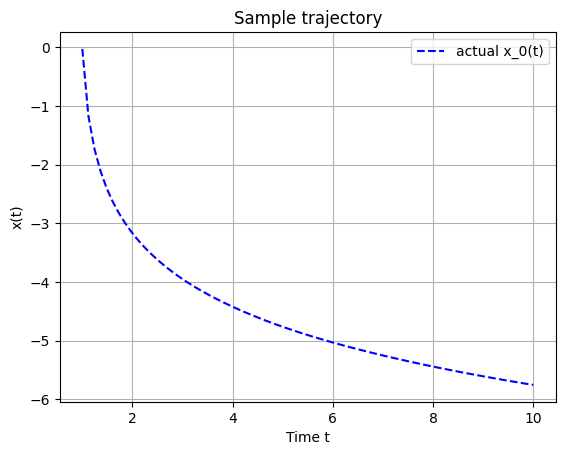

In [94]:
sample_number = 129426974
sample_name = "sample_random_" + str(sample_number) + ".pt"
sample_path = os.path.join(samples_path, sample_name)
with open(sample_path, 'rb') as f:
    sample = pickle.load(f)
print('dimension = ', sample['infos']['dimension'])
times = sample['times']
trajectory = sample['trajectory']
# original sample trajectory
x_0 = trajectory[:, 0]
# x_1 = trajectory[:, 1]

# Plot the solution
plt.plot(times, x_0, label="actual x_0(t)", color='blue', linestyle = 'dashed')
# plt.plot(times, x_1, label="actual x_1(t)", color = 'red', linestyle = 'dashed')
plt.xlabel("Time t")
plt.ylabel("x(t)")
plt.title("Sample trajectory")
plt.legend()
plt.grid()
plt.show()

In [38]:
def print_sample_and_prediction(sample_number):
  print(f'\nsample_number = {sample_number}')
  # activation_name = "activation_random_" + str(sample_number) + ".pt"
  # activation_path = os.path.join(activations_path, activation_name)
  # with open(activation_path, 'rb') as f:
  #     activation = pickle.load(f)
  # print(activation['r2_score'])

  sample_name = "sample_random_" + str(sample_number) + ".pt"
  sample_path = os.path.join(samples_path, sample_name)
  with open(sample_path, 'rb') as f:
      sample = pickle.load(f)
  print('dimension = ', sample['infos']['dimension'])
  times = sample['times']
  trajectory = sample['trajectory']
  preds = dstr.fit(times, trajectory)
  # pred_traj = dstr.predict(times, trajectory[0])
  print('sample:')
  print(sample['tree'])
  print('prediction:')
  dstr.print()


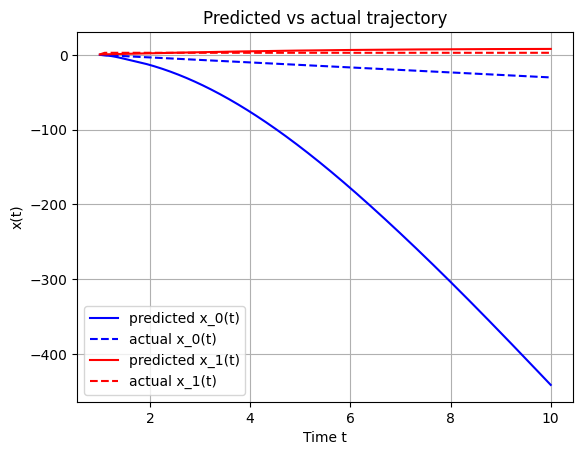

In [16]:
# an example where the predicted dimension didn't match the actual dimension, but the predicted x_0' and x_1' expressions didn't contain x_2 so could solve for predicted x_0 and x_1 and plot

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math

sample_number = 225674201

sample_name = "sample_random_" + str(sample_number) + ".pt"
sample_path = os.path.join(samples_path, sample_name)
with open(sample_path, 'rb') as f:
    sample = pickle.load(f)
times = sample['times']
trajectory = sample['trajectory']

# Define the ODE dy/dt = -2y
def odefunc(t, x):
    x_0, x_1= x

    dx0dt = 3.4510 * (10.7500 * (0.1072 + -0.1568 * x_0)**-1 + 6.3190 * x_0)**-1 + -8.8170 * x_1
    dx1dt = 18.9500 * np.sin(0.0872 + 0.0795 * x_1) + -1.5500 * x_1
    # dx2dt = 0.6188 * x_2 * (-0.3547 + 0.1204 * x_0)**-1

    return [dx0dt, dx1dt]

# Define the time domain (from t=0 to t=5)
tf = 10
t_span = (1, tf)
t_eval = np.linspace(1, tf, 500)  # Points where solution is computed

# Initial condition y(0) = 1
x_init = trajectory[0]

# Solve the ODE
solution = solve_ivp(odefunc, t_span, x_init, t_eval=t_eval, method='RK45')

# original sample trajectory
x_0 = trajectory[:, 0]
x_1 = trajectory[:, 1]

# Plot the solution
plt.plot(solution.t, solution.y[0], label="predicted x_0(t)", color = 'blue')
plt.plot(times, x_0, label="actual x_0(t)", color='blue', linestyle = 'dashed')
plt.plot(solution.t, solution.y[1], label="predicted x_1(t)", color = 'red')
plt.plot(times, x_1, label="actual x_1(t)", color = 'red', linestyle = 'dashed')
plt.xlabel("Time t")
plt.ylabel("x(t)")
plt.title("Predicted vs actual trajectory")
plt.legend()
plt.grid()
plt.show()


# Train probes

In [34]:
import experiments

In [ ]:
target_feature = '1D'
activations_path = activations_path
demo_probes_path = f'{probes_path}/dimensions'
lr = 0.01
num_epochs = 20
num_repeats = 3
# doesn't work for encoder layers because time points vary between samples
layers = [idx for idx in range(4, 16)]

In [ ]:
expt_results = experiments.separability_testing(target_feature=target_feature, activations_path=activations_path, \
                     probes_path=demo_probes_path, \
                     lr=lr, num_epochs=num_epochs, \
                     layers=layers, num_repeats=num_repeats)
# save experiment results
with open(f'{probes_path}/experiment_data.pt', 'wb') as f:
    pickle.dump(expt_results, f)

# Plot results

In [40]:
# load experiment results
with open(f'{probes_path}/experiment_data.pt', 'rb') as f:
    expt_results = pickle.load(f)

In [30]:
import experiments.utils as expt_utils

expt_summary = expt_utils.summarise_experiment(expt_results, incl_acc = True)

In [31]:
expt_summary

,layer,accuracy_mean,accuracy_std,loss_mean,loss_std
0,4,0.854167,0.043899,0.624096,0.214965
1,5,0.825000,0.045069,1.217205,0.598643
2,6,0.775000,0.033072,0.610781,0.083472
3,7,0.816667,0.071078,0.423135,0.026413
4,8,0.900000,0.012500,0.243307,0.016791
5,9,0.979167,0.007217,0.099095,0.008909
6,10,0.979167,0.007217,0.057211,0.010759
7,11,0.975000,0.012500,0.271577,0.002344
8,12,0.987500,0.000000,0.145755,0.010041
9,13,0.941667,0.014434,0.371425,0.024149


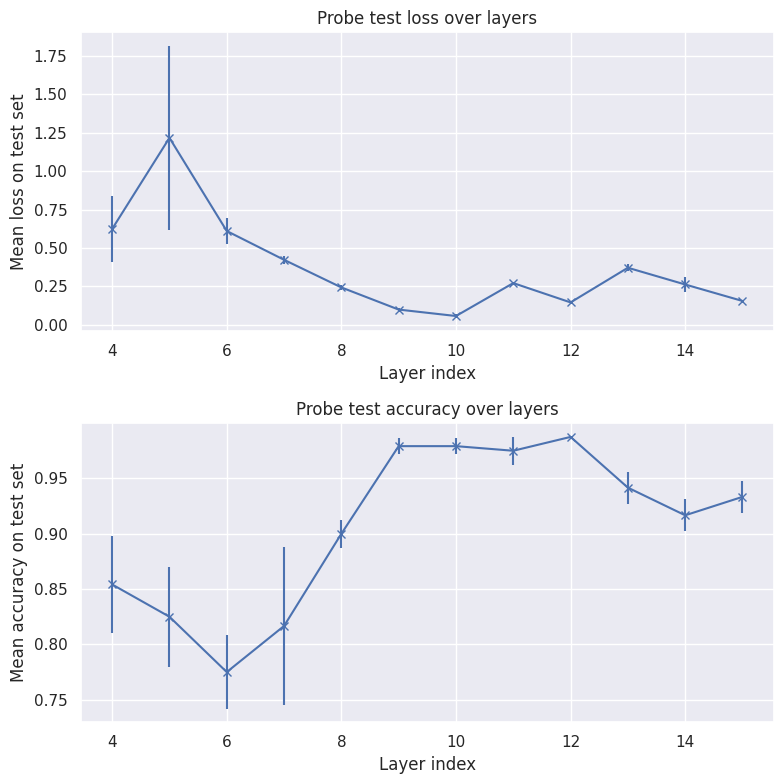

In [38]:
expt_utils.plot_from_summary(expt_summary, incl_acc = True, descriptor='dimensions')

# Compare odeformer and probe failures
Summary: there is no overlap between samples odeformer predicted incorrect dimension for, and samples that the probe failed on.

In [84]:
# Samples that probe failed on

from collections import Counter
import re
import pandas as pd

incorrectly_classified = [item for sublist in expt_results["test_fail_ids"] for item in sublist]

# Extract only the integer part using regex
incorrectly_classified = [re.search(r"\d+", s).group() for s in incorrectly_classified]

# Check whether the samples that the probe incorrectly classifies are the samples that odeformer gets the dimension wrong for
incorrectly_classified_set = set(incorrectly_classified)
incorrect_dimension_set = set(incorrect_dim_samples)
print('examples incorrectly classified by probe')
print(incorrectly_classified_set)
print('examples incorrect dimension from odeformer')
print(incorrect_dimension_set)
print('both probe and odeformer incorrect = ' , incorrectly_classified_set & (incorrect_dimension_set))

count_dict = Counter(incorrectly_classified)

# Convert to df and sort by number of incorrect classifications
df = pd.DataFrame(count_dict.items(), columns=["sample_id", "n_incorrect_classifications"]).sort_values(by="n_incorrect_classifications", ascending=False)

df.reset_index(drop=True, inplace=True)

# add column for whether the dimension was incorrcetly predicted by odeformer
df["incorrect_dim"] = df["sample_id"].isin(incorrect_dim_samples).astype(int)

# display(df.head(10))

examples incorrectly classified by probe
{'519000238', '884472616', '124013621', '192370818', '373539274', '236922228', '610581178', '604307032', '839723101', '553286399', '103504642', '90303475', '725184784', '242444169', '380245939', '94104903', '763602571', '434533742', '851184646', '207193684', '830752998', '948703570', '662357021', '44388601', '216102106', '141094298', '637715649', '503189194', '684325677', '491665715', '941159610', '610073728', '683841511', '61795689', '164293315', '706075936', '429430748', '483680608', '380124039', '714490647', '276007299', '992299622', '636982865', '260105172', '183630343', '356735651', '974386482', '617395476', '183645406', '156649206', '871619251', '383242810', '628728823', '178548361', '7273913', '867963851', '274009924', '253419017', '698802812', '694045779', '653158955'}
examples incorrect dimension from odeformer
{'205609663', '223525547', '124181353', '334308324', '289488080', '707653326', '129426974', '965848253', '136791435', '7302951'


# Test odeformer with trivial extra dimensions

Edit the sample to increase their dimensionality by one, but only by adding constant variables (x_i = constant).

See if odeformer predicts the dimensionality to include the constant variables or leaves them out.

Result from adding zero column: yes, it does change the dimension of the result. Some samples look like they give close to constant for the extra dimension, but no quite (e.g. exp(-0.005x)).

In [25]:
# first try adding a zero column to trajectory
cnt = 0
# load original samples that are 1d
for sample_file in os.listdir(samples_path):
  if cnt > 50:
    break
  sample_name = os.fsdecode(sample_file)
  sample_path = os.path.join(samples_path, sample_name)
  with open(sample_path, 'rb') as f:
        sample = pickle.load(f)
        if sample['feature_dict']['1D'] == 1:
          cnt += 1
          print(f'sample number: {cnt}')
          print('true solution:')
          print(sample['tree'])
          # edit trajectory of sample to bump it up to 2d
          times = sample['times']
          trajectory = sample['trajectory']
          extra_dim = np.full((trajectory.shape[0], 1), 0)
          new_trajectory = np.hstack((trajectory, extra_dim))
          # run odeformer on original trajectory
          preds = dstr.fit(times, trajectory)
          # print the prediction
          print('prediction on original sample:')
          dstr.print()
          # run odeformer on new trajectory
          preds = dstr.fit(times, new_trajectory)
          # print the prediction
          print('prediction on 2D trajectory:')
          dstr.print()
          print()




sample number: 1
true solution:
-4.0636 * (x_0)**4
prediction on original sample:
x_0' = -4.1028 * (x_0)**4
prediction on 2D trajectory:
x_0' = 0.1281 * x_0 + -2.4851 * (x_0)**3
x_1' = -1.4630 * x_1 * sin(-0.1329 + 6.8320 * x_1)

sample number: 2
true solution:
0.0936 * sin(18.2055 + 0.1203 * x_0 * (-0.2534 + -4.9483 * x_0)) + 0.0950 * sin(0.1628 * x_0)
prediction on original sample:
x_0' = -0.0398 + -0.0354 * x_0
prediction on 2D trajectory:
x_0' = -0.0220 + -0.0611 * x_0
x_1' = -0.0044 * x_1

sample number: 3
true solution:
-18.1658 * x_0
prediction on original sample:
x_0' = -18.4100 * x_0
prediction on 2D trajectory:
x_0' = 0.0328 + -16.3200 * x_0 + -1.1600 * x_0 * sin(1.1802 * x_0 + 10.3800 * x_1)
x_1' = 0.1797 * (x_0)**2

sample number: 4
true solution:
-1.0735 * x_0
prediction on original sample:
x_0' = -1.0730 * x_0
prediction on 2D trajectory:
x_0' = 0.0066 + -0.9883 * x_0
x_1' = -0.0074 * x_0

sample number: 5
true solution:
0.1845 * x_0
prediction on original sample:
x_0' = 